## Анализ и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

In [2]:
dff = pd.read_csv('processed_data.csv')
print(dff.shape)
dff.head(4)

(13914, 21)


,Адрес,Район города,Тип дома,Высота потолков,Год постройки,Сан/узел,Балкон,Ремонт,Примечания,Цена,...,Дополнительно,Полы,Все комнаты,Раздельных комнат,Этаж,Этажность,Площадь общая,Площадь жилая,Площадь кухни,Расстояние до метро
0,Прилукская ул.,Московский район,каркасно-блочный,2.7,2022.0,2 сан.узла,лоджия застекленная,без отделки,Новый жилой комплекс комфорт класса «Smart» на...,125146,...,NaN,NaN,1.0,1.0,7,14,41.74,27.56,NaN,900.0
1,"Червякова ул., 22 Информация о доме",Центральный район,кирпичный,2.5,1969.0,раздельный,балкон,нормальный ремонт,Поможем продать вашу квартиру для покупки этой.,161805,...,NaN,NaN,3.0,2.0,2,9,60.10,41.60,8.20,-1.0
2,"Богдановича ул., 55 Информация о доме",Советский район,панельный,-1.0,1978.0,раздельный,2 лоджии застекленные,отличный ремонт,"Отличный ремонт, качественные материалы, стекл...",265461,...,"встроенные шкафы, стеклопакеты, бытовая техника",NaN,4.0,2.0,7,9,79.10,54.06,7.20,1450.0
3,"Пионерская ул., 3 Информация о доме",Центральный район,каркасно-блочный,-1.0,2008.0,2 сан.узла,2 балкона,евроремонт,Объединение двух квартир (перепланировка).Мало...,758460,...,"мебель, готова к проживанию, элитная квартира",паркет,4.0,0.0,3,5,160.00,70.58,52.65,-1.0


In [3]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13914 entries, 0 to 13913
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Адрес                13914 non-null  object 
 1   Район города         13914 non-null  object 
 2   Тип дома             13061 non-null  object 
 3   Высота потолков      13914 non-null  float64
 4   Год постройки        13261 non-null  float64
 5   Сан/узел             11039 non-null  object 
 6   Балкон               12846 non-null  object 
 7   Ремонт               8511 non-null   object 
 8   Примечания           7170 non-null   object 
 9   Цена                 13914 non-null  int64  
 10  Планировка           11641 non-null  object 
 11  Дополнительно        10645 non-null  object 
 12  Полы                 7144 non-null   object 
 13  Все комнаты          8284 non-null   float64
 14  Раздельных комнат    13911 non-null  float64
 15  Этаж                 13914 non-null 

In [4]:
var_cat = ['Район города', 'Тип дома', 'Сан/узел', 'Балкон', 'Ремонт',
          'Полы']

target = 'Цена'

var_real = ['Расстояние до метро', 'Площадь кухни', 'Площадь общая', 'Площадь жилая', 'Этажность',
           'Этаж', 'Раздельных комнат', 'Все комнаты', 'Год постройки', 'Высота потолков']

In [5]:
df = dff[var_real + var_cat + [target]]

In [6]:
df.head()

,Расстояние до метро,Площадь кухни,Площадь общая,Площадь жилая,Этажность,Этаж,Раздельных комнат,Все комнаты,Год постройки,Высота потолков,Район города,Тип дома,Сан/узел,Балкон,Ремонт,Полы,Цена
0,900.000000,NaN,41.74,27.56,14,7,1.0,1.0,2022.0,2.70,Московский район,каркасно-блочный,2 сан.узла,лоджия застекленная,без отделки,NaN,125146
1,-1.000000,8.20,60.10,41.60,9,2,2.0,3.0,1969.0,2.50,Центральный район,кирпичный,раздельный,балкон,нормальный ремонт,NaN,161805
2,1450.000000,7.20,79.10,54.06,9,7,2.0,4.0,1978.0,-1.00,Советский район,панельный,раздельный,2 лоджии застекленные,отличный ремонт,NaN,265461
3,-1.000000,52.65,160.00,70.58,5,3,0.0,4.0,2008.0,-1.00,Центральный район,каркасно-блочный,2 сан.узла,2 балкона,евроремонт,паркет,758460
4,409.008049,8.80,50.80,28.30,9,8,2.0,2.0,2003.0,2.52,Фрунзенский район,панельный,раздельный,лоджия застекленная,NaN,NaN,161552


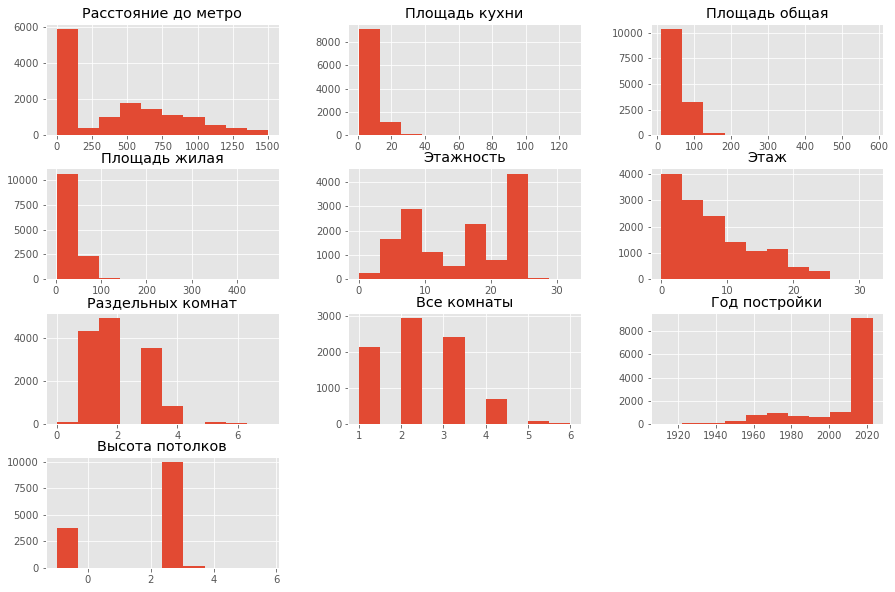

In [7]:
df[var_real].hist(figsize=(15,10));

In [8]:
df[var_real].isnull().sum()

Расстояние до метро       0
Площадь кухни          3594
Площадь общая             1
Площадь жилая           701
Этажность                 0
Этаж                      0
Раздельных комнат         3
Все комнаты            5630
Год постройки           653
Высота потолков           0
dtype: int64

In [9]:
df['Площадь кухни'].fillna(df['Площадь кухни'].median(), inplace=True)
df['Площадь жилая'].fillna(df['Площадь жилая'].median(), inplace=True)
df['Площадь общая'].fillna(df['Площадь общая'].median(), inplace=True)


df['Раздельных комнат'].fillna(df['Раздельных комнат'].median(), inplace=True)
df['Все комнаты'].fillna(df['Все комнаты'].median(), inplace=True)
df['Год постройки'].fillna(df['Год постройки'].median(), inplace=True)



C:\Users\Maksim\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<Figure size 1080x864 with 0 Axes>

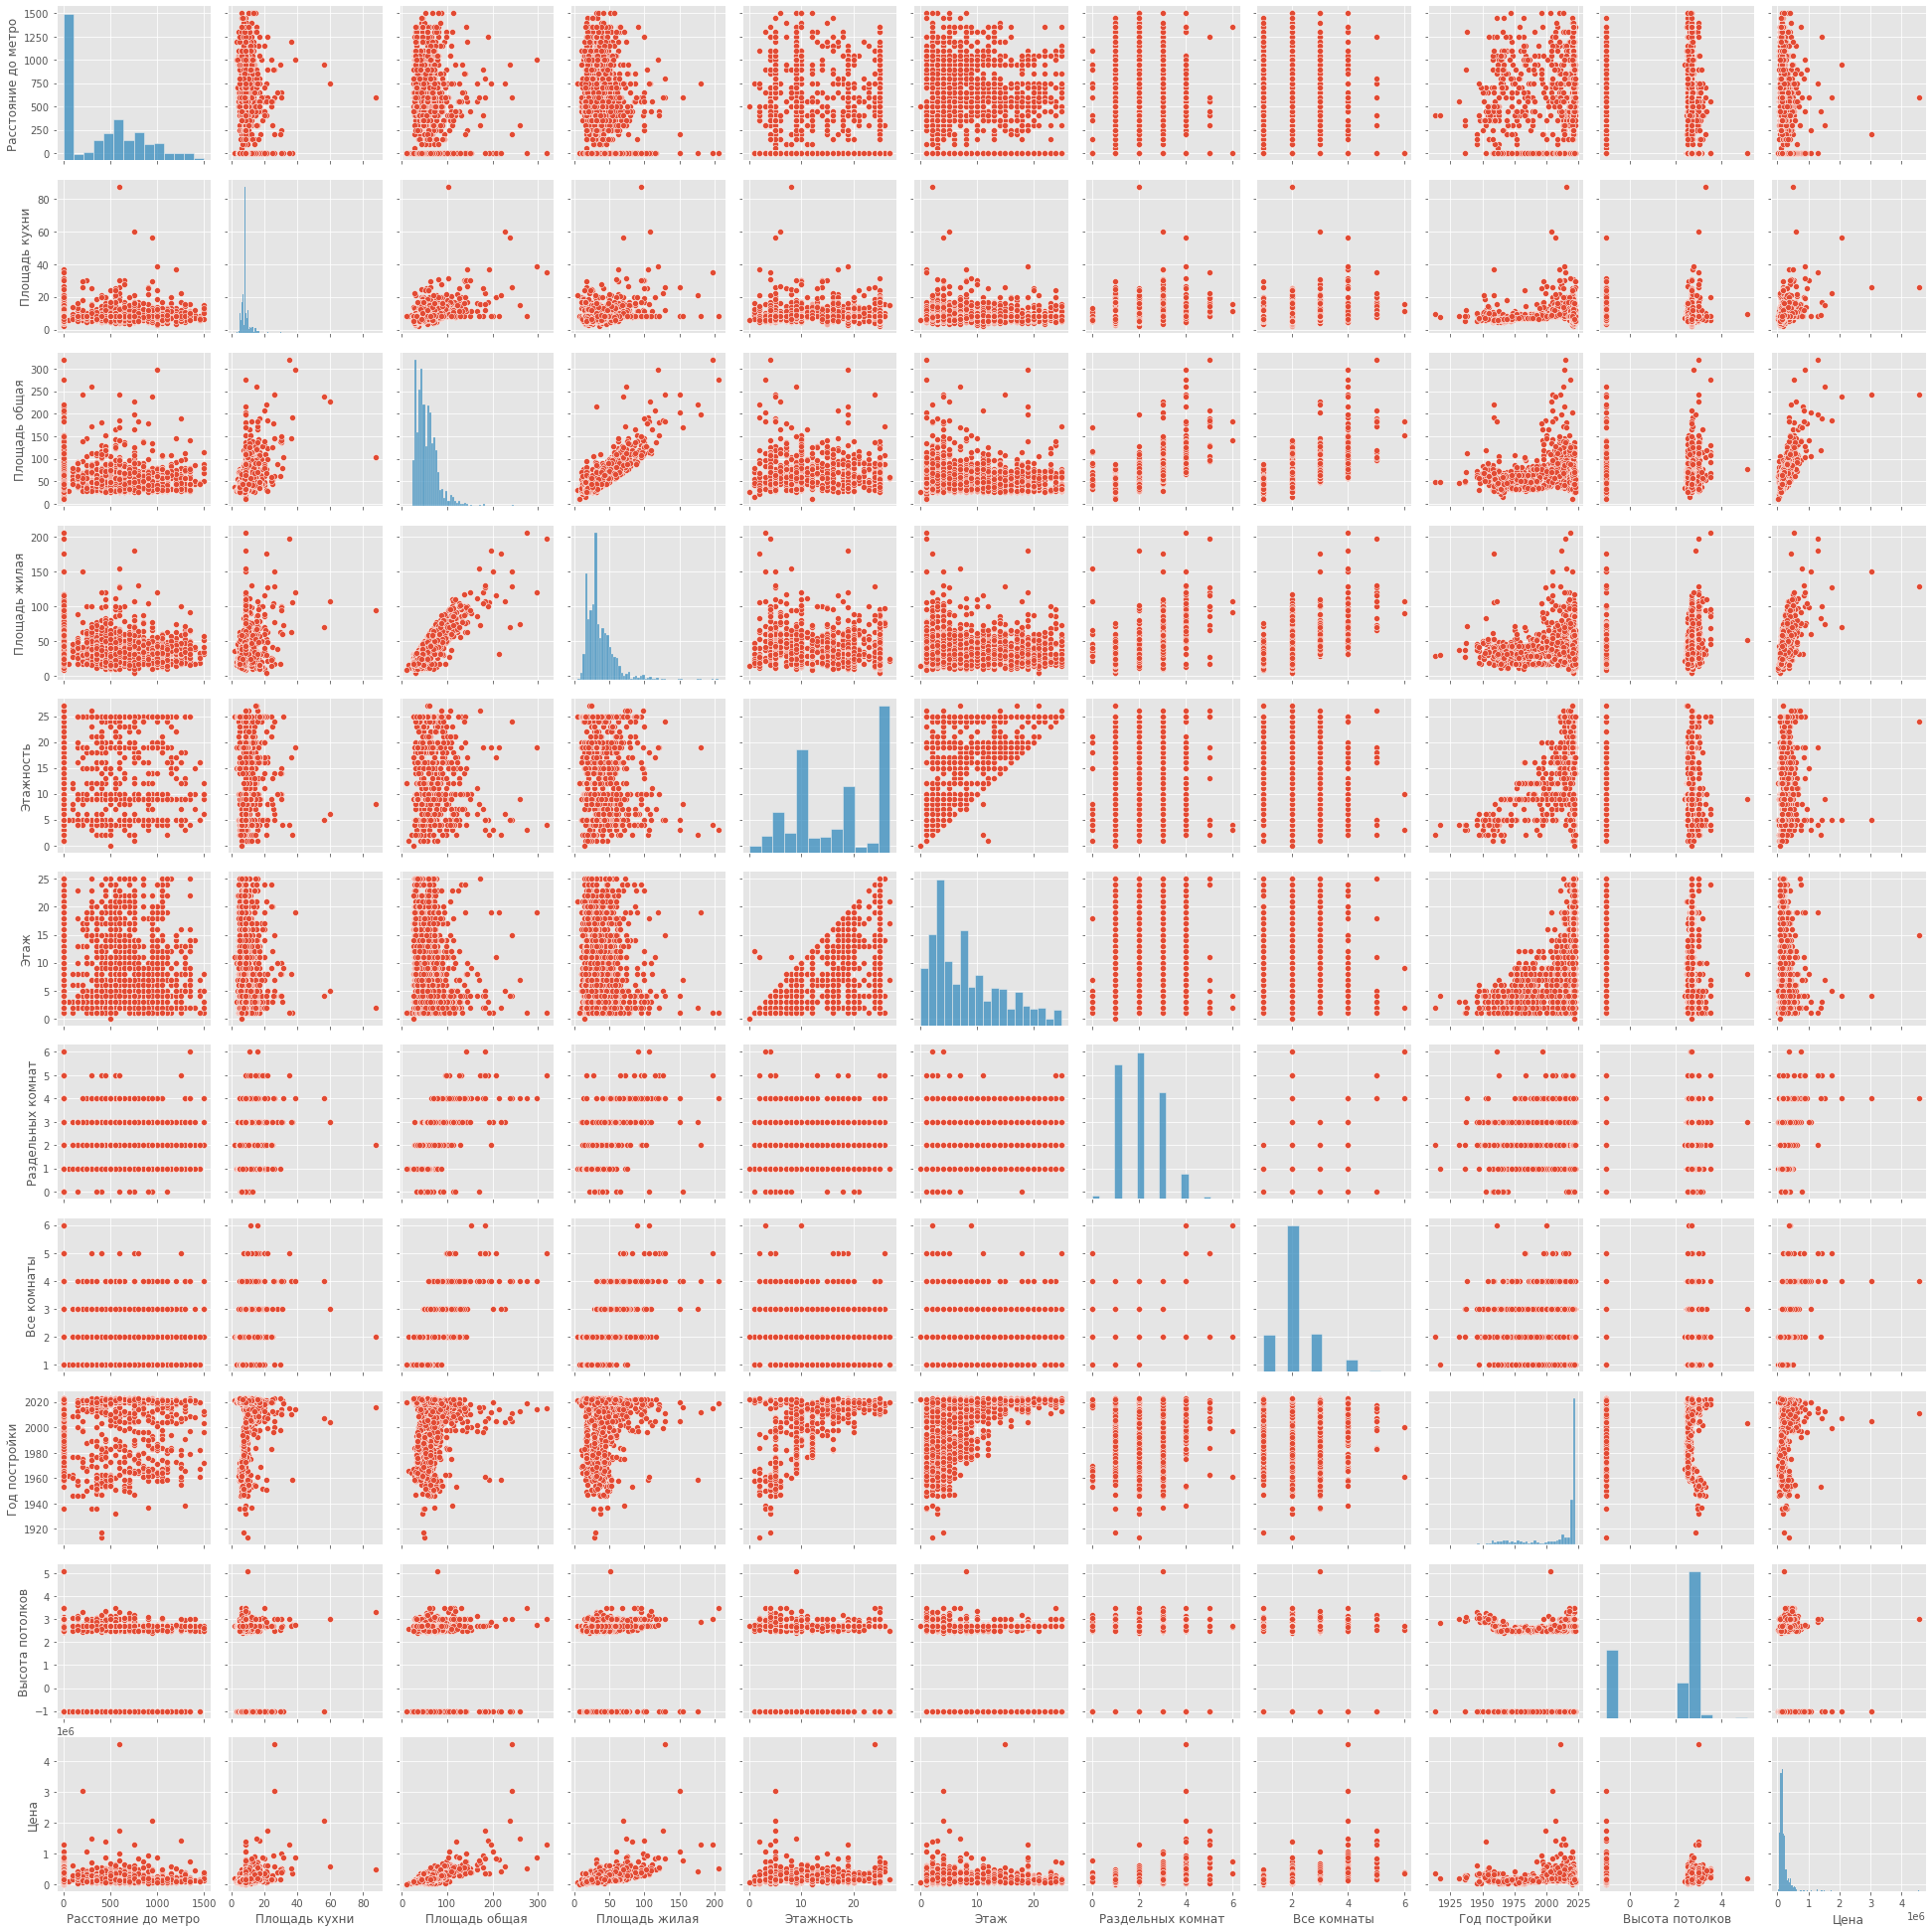

In [10]:
plt.figure(figsize=(15,12))
sns.pairplot(df[var_real + [target]].sample(2000))

Посмотрим на распределение цены

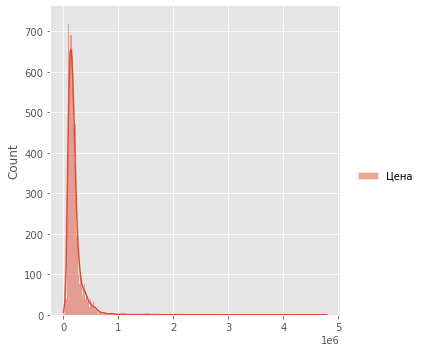

In [11]:
sns.displot(df[[target]], kde=True);

Прологарифмируем наши данные 

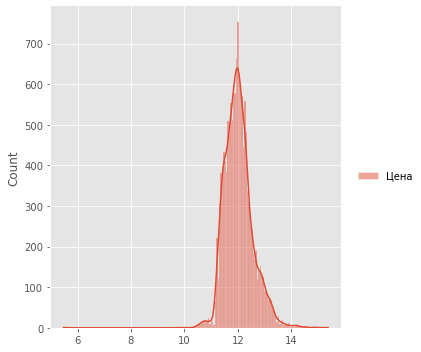

In [12]:
sns.displot(df[[target]].apply(lambda w: np.log(w)), kde=True);

Как видно из графика большинство цен лежиит в диапозоне от 10 до 14 и не наблюдается выбросов. 


Посмотрим на корреляцию наших признаков

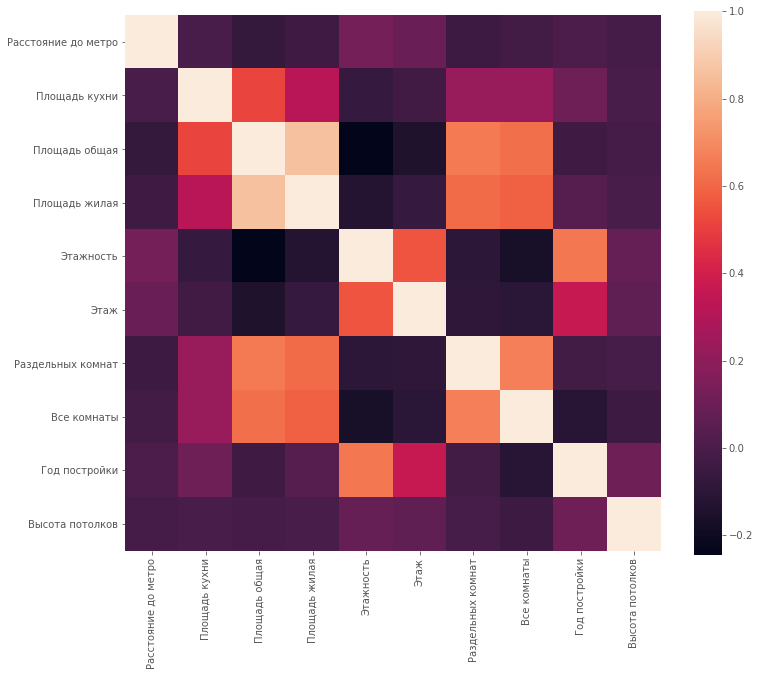

In [13]:
corrmat = df[var_real].corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, square=True);

Из графика можно увидеть что больше всего между собой коррелирует 'Площадь жилая' и 'Площадь общая', а также 'Раздельные комнаты' и 'Все комнаты'

Теперь перейдем к категориальным признакам

In [14]:
df[var_cat].isnull().sum()

Район города       0
Тип дома         853
Сан/узел        2875
Балкон          1068
Ремонт          5403
Полы            6770
dtype: int64

In [15]:
df['Район города'].unique()

array(['Московский район', 'Центральный район', 'Советский район',
       'Фрунзенский район', 'Первомайский район', 'Заводской район',
       'Ленинский район', 'Октябрьский район', 'Партизанский район', 'М',
       'n'], dtype=object)

Удалим непонятные для нас районы

In [16]:
df = df[df['Район города'] != 'n']
df = df[df['Район города'] != 'М']

Заменим NaN отдельным типом 

In [17]:
df['Тип дома'].unique()

array(['каркасно-блочный', 'кирпичный', 'панельный', 'силикатные блоки',
       'монолитный', 'блок-комнаты', 'бревенчатый', nan, 'мк'],
      dtype=object)

In [18]:
df['Тип дома'].fillna('Неизвестно', inplace=True)

In [19]:
df['Сан/узел'].unique()

array(['2 сан.узла', 'раздельный', 'совмещенный', nan, '4 сан.узла',
       '3 сан.узла'], dtype=object)

In [20]:
df['Сан/узел'].fillna('Неизвестно', inplace=True)

In [21]:
df['Полы'].unique()

array([nan, 'паркет', 'ламинированные', 'линолеум', 'бетонная стяжка',
       'деревянные', 'плитка', 'ДСП', 'ковровое покрытие'], dtype=object)

In [22]:
df['Полы'].fillna('Неизвестно', inplace=True)

In [23]:
df['Ремонт'].unique()

array(['без отделки', 'нормальный ремонт', 'отличный ремонт',
       'евроремонт', nan, 'хороший ремонт', 'строительная отделка',
       'удовлетворительный ремонт', 'плохое состояние',
       'аварийное состояние'], dtype=object)

In [24]:
df['Ремонт'].fillna('Неизвестно', inplace=True)

In [25]:
df['Балкон'].unique()

array(['лоджия застекленная', 'балкон', '2 лоджии застекленные',
       '2 балкона', 'нет', 'лоджия', nan, 'балкон застекленный + вагонка',
       'балкон застекленный', 'лоджия застекленная + вагонка', '2 лоджии',
       '2 балкона застекленные', 'терраса',
       '2 лоджии застекленные + вагонка', 'лоджия из кухни',
       'балкон и лоджия', '2 лоджии 1 застекленная',
       '2 балкона 1 застекленный', 'балкон+терраса',
       'лоджия из кухни застеклена',
       'лоджия из кухни застеклена + вагонка',
       '2 балкона застекленные + вагонка', '3 лоджии застекленные',
       '3 балкона', '3 балкона застекленных', 'эркер', '3 лоджии',
       'веранда'], dtype=object)

In [26]:
df['Балкон'].fillna('Неизвестно', inplace=True)

Значения в столбцах 'Балкон' и 'Ремонт' можно поделить на группы

In [27]:
mapping_for_repair = {
        'аварийное состояние':'Группа_-1',
        'Неизвестно':'Группа_0',
        'без отделки':'Группа_1',
        'строительная отделка':'Группа_2',
        'плохое состояние':'Группа_3',
        'удовлетворительный ремонт':'Группа_4',
        'хороший ремонт':'Группа_5',
        'нормальный ремонт':'Группа_5',
        'евроремонт':'Группа_6',
        'отличный ремонт':'Группа_6',
    }
df['Ремонт'].replace(mapping_for_repair, inplace=True)

In [28]:
mapping_for_balcony = {
        'эркер':'эркер',
        'нет' : 'нет',
        'веранда':'веранда',
        'Неизвестно':'неизвестно',
        'терраса':'терраса',
        'балкон+терраса':'терраса',
        'лоджия застекленная':'лоджия',
        'лоджия':'лоджия',
        'лоджия застекленная + вагонка':'лоджия',
        'лоджия из кухни':'лоджия',
        'лоджия из кухни застеклена':'лоджия',
        'лоджия из кухни застеклена + вагонка':'лоджия',
        '2 лоджии застекленные':'2 лоджии',
        '2 лоджии':'2 лоджии',
        '2 лоджии застекленные + вагонка':'2 лоджии',
        '2 лоджии 1 застекленная' : '2 лоджии',
        '3 лоджии застекленные':'3 лоджии',
        '3 лоджии':'3 лоджии',
        'балкон' : 'балкон',
        'балкон застекленный + вагонка':'балкон',
        'балкон застекленный':'балкон',
        '2 балкона' : '2 балкона',
        '2 балкона застекленные':'2 балкона',
        '2 балкона 1 застекленный':'2 балкона',
        '2 балкона застекленные + вагонка' : '2 балкона',
        '3 балкона':'3 балкона',
        '3 балкона застекленных' : '3 балкона',       
    }

df['Балкон'].replace(mapping_for_balcony, inplace=True)

Посмотрим на графики для категориальных столбцов

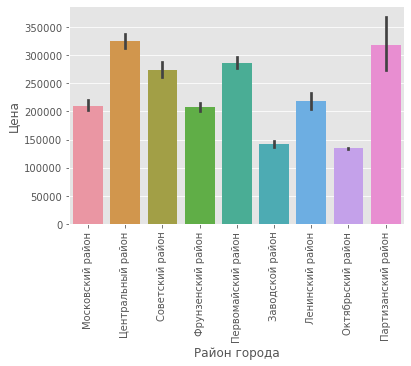

In [29]:
r = [i for i in df['Район города'].unique()]
fig = sns.barplot(x = 'Район города',y = 'Цена', data = df);
fig.set_xticklabels(labels=r, rotation=90);

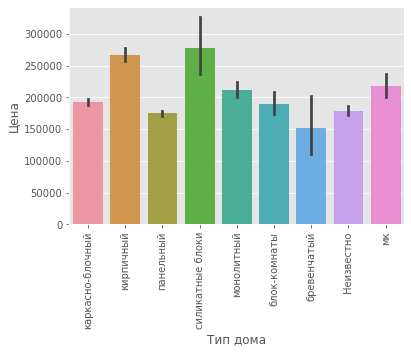

In [30]:
t = [i for i in df['Тип дома'].unique()]
fig = sns.barplot(x = 'Тип дома',y = 'Цена', data = df);
fig.set_xticklabels(labels=t, rotation=90);

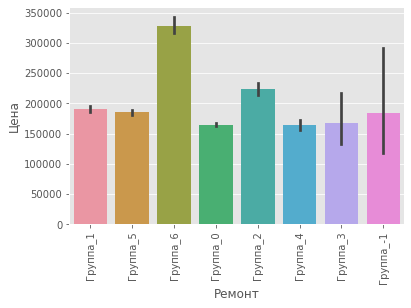

In [31]:
p = [i for i in df['Ремонт'].unique()]
fig = sns.barplot(x = 'Ремонт',y = 'Цена', data = df);
fig.set_xticklabels(labels=p, rotation=90);

## Посторение модели

In [32]:
print(df.shape)
df = pd.get_dummies(df)
print(df.shape)

(13879, 17)
(13879, 64)


In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [34]:
X = df.drop('Цена', axis=1)
y = df['Цена']

In [35]:
#разобьем данные на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [36]:
#MinMaxScaler
scaler = MinMaxScaler()
X_trainS = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

X_testS = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### Линейная регрессия

В качестве нашей метрики будем использовать MAE (Mean Absolute Error)

In [37]:
y_train = y_train.apply(lambda x: np.log(x))
y_test = y_test.apply(lambda x: np.log(x))

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X_trainS, y_train)
pred_lin_reg = lin_reg.predict(X_testS)

print("MAE = {}".format(str(round(mean_absolute_error(np.exp(pred_lin_reg), np.exp(y_test))))))

MAE = 44259


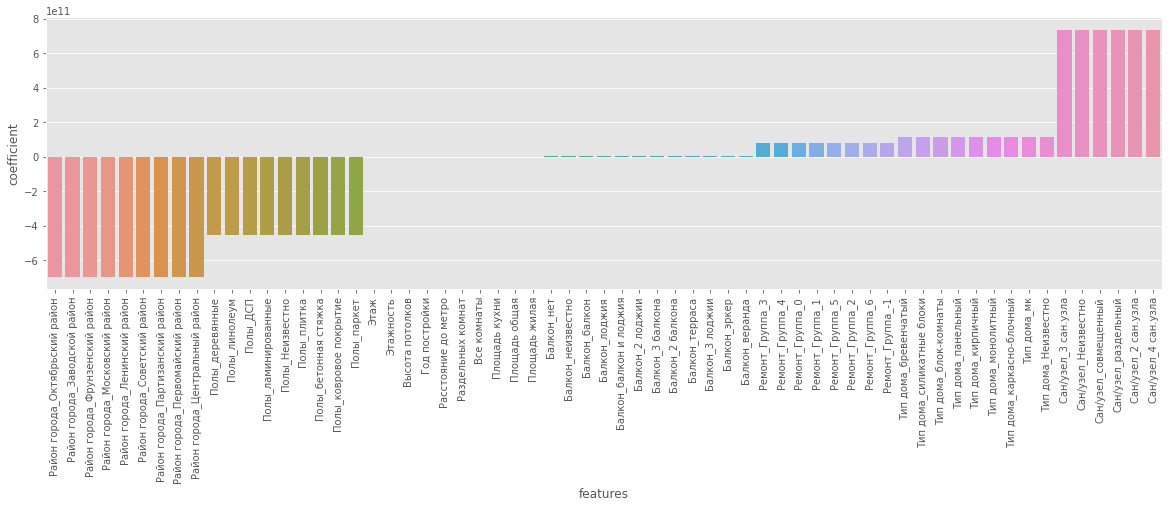

In [40]:
Feature_line = pd.DataFrame({'features': X_train.columns, 'coefficient':[i for i in list(lin_reg.coef_)]}).sort_values('coefficient')
plt.figure(figsize=(20,5))
sns.barplot(data=Feature_line, x='features', y='coefficient')
plt.xticks(rotation=90)
plt.show()

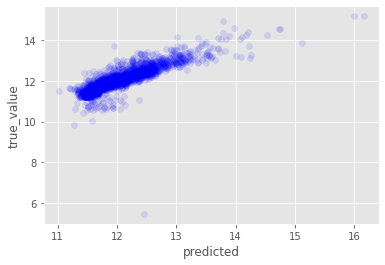

In [41]:
plt.scatter(pred_lin_reg, y_test, alpha=0.1, c ="blue");
plt.xlabel('predicted');
plt.ylabel('true_value');

In [42]:
from sklearn.linear_model import Ridge

In [43]:
ridge = Ridge()
ridge.fit(X_trainS, y_train)
ridge_pred = ridge.predict(X_testS)

print("MAE = {}".format(str(round(mean_absolute_error(np.exp(ridge_pred), np.exp(y_test))))))

MAE = 43137


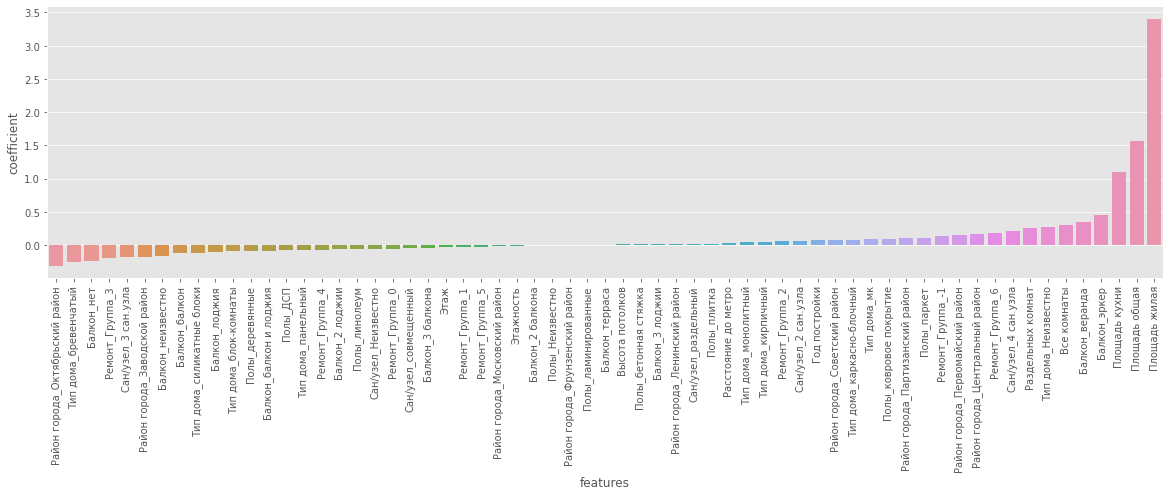

In [44]:
Feature_line = pd.DataFrame({'features': X_train.columns, 'coefficient':[i for i in list(ridge.coef_)]}).sort_values('coefficient')
plt.figure(figsize=(20,5))
sns.barplot(data=Feature_line, x='features', y='coefficient')
plt.xticks(rotation=90)
plt.show()

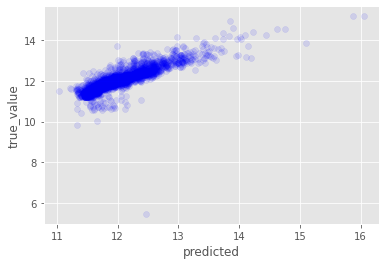

In [45]:
plt.scatter(ridge_pred, y_test, alpha=0.1, c ="blue");
plt.xlabel('predicted');
plt.ylabel('true_value');

### Ансамблевые модели

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rf = RandomForestRegressor()
params = {'max_depth' : [5, 7, 9, 12, 15, 20], 'n_estimators': [100, 200, 300, 500], 'min_samples_split': range(2, 10, 2)}
gs_rf = GridSearchCV(rf, params, cv=3, n_jobs=-1, verbose=1)
gs_rf.fit(X_trainS, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 12, 15, 20],
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [100, 200, 300, 500]},
             verbose=1)

In [48]:
print(gs_rf.best_params_)

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 500}


In [49]:
rf = RandomForestRegressor(**gs_rf.best_params_)
rf.fit(X_trainS, y_train)
rf_pred = rf.predict(X_testS)
print("MAE = {}".format(str(round(mean_absolute_error(np.exp(rf_pred), np.exp(y_test))))))

MAE = 21912


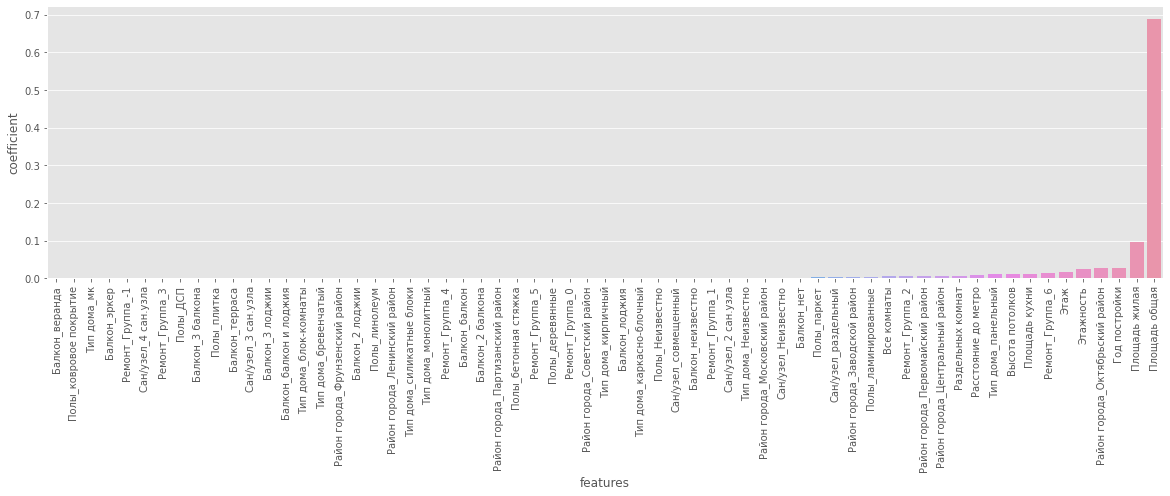

In [50]:
Feature_line = pd.DataFrame({'features': X_train.columns, 'coefficient':[i for i in list(rf.feature_importances_)]}).sort_values('coefficient')
plt.figure(figsize=(20,5))
sns.barplot(data=Feature_line, x='features', y='coefficient')
plt.xticks(rotation=90)
plt.show()

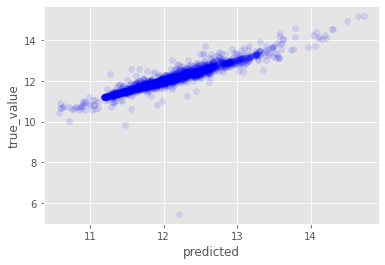

In [51]:
plt.scatter(rf_pred, y_test, alpha=0.1, c ="blue");
plt.xlabel('predicted');
plt.ylabel('true_value');

Видно, что случайный лес показвает качество почти в 2 раза лучше, чем линейная регрессия

### Бустинги

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

In [53]:
gbm = GradientBoostingRegressor()
params_gbm ={'learning_rate': np.linspace(0.01, 1, 10),'n_estimators':[50, 100, 150],'max_depth':[5, 7, 9, 12, 15, 20]}
gs_gbm = GridSearchCV(gbm, params_gbm, cv=3, n_jobs=-1, verbose=1)
gs_gbm.fit(X_trainS, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                         'max_depth': [5, 7, 9, 12, 15, 20],
                         'n_estimators': [50, 100, 150]},
             verbose=1)

In [54]:
print(gs_rf.best_params_)

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 500}


In [55]:
gbm = GradientBoostingRegressor(**gs_gbm.best_params_)
gbm.fit(X_trainS, y_train)
gbm_pred = gbm.predict(X_testS)
print("MAE = {}".format(str(round(mean_absolute_error(np.exp(gbm_pred), np.exp(y_test))))))

MAE = 21484


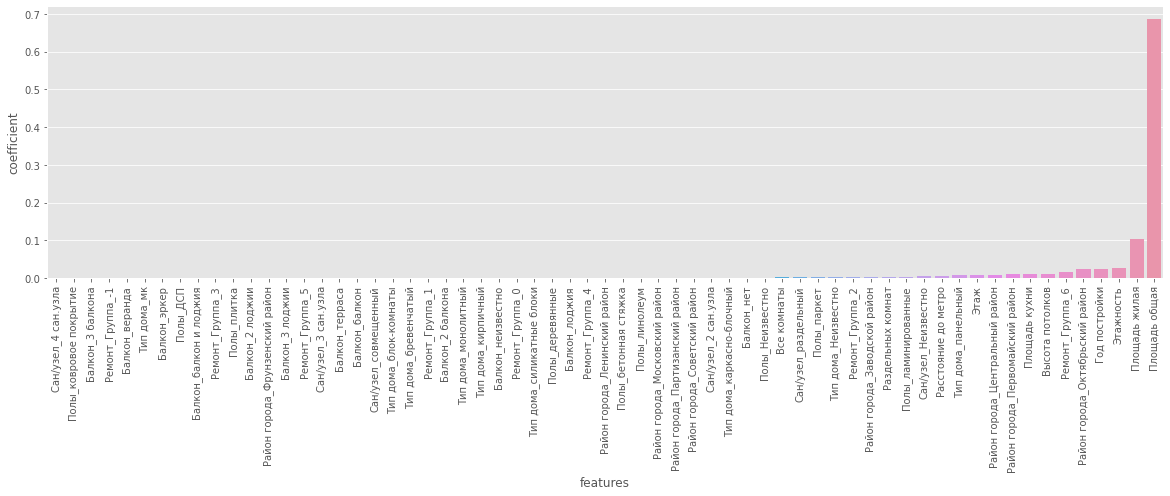

In [56]:
Feature_line = pd.DataFrame({'features': X_train.columns, 'coefficient':[i for i in list(gbm.feature_importances_)]}).sort_values('coefficient')
plt.figure(figsize=(20,5))
sns.barplot(data=Feature_line, x='features', y='coefficient')
plt.xticks(rotation=90)
plt.show()

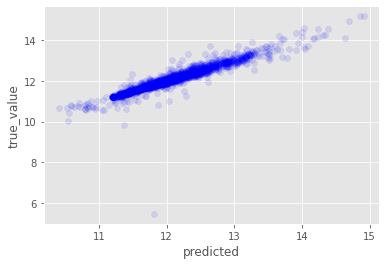

In [57]:
plt.scatter(gbm_pred, y_test, alpha=0.1, c ="blue");
plt.xlabel('predicted');
plt.ylabel('true_value');

In [58]:
from catboost import CatBoostRegressor

In [59]:
cat = CatBoostRegressor()

params_cat = {'learning_rate': [0.03, 0.1], 'depth': [5, 7, 9, 12, 15]}
        
gs_cat = cat.grid_search(params_cat, X_trainS, y_train, cv=3, verbose=1)


0:	learn: 11.6801960	test: 11.6942777	best: 11.6942777 (0)	total: 149ms	remaining: 2m 28s
1:	learn: 11.3318842	test: 11.3457968	best: 11.3457968 (1)	total: 157ms	remaining: 1m 18s
2:	learn: 10.9943939	test: 11.0081945	best: 11.0081945 (2)	total: 162ms	remaining: 53.9s
3:	learn: 10.6665494	test: 10.6804313	best: 10.6804313 (3)	total: 166ms	remaining: 41.4s
4:	learn: 10.3490786	test: 10.3631904	best: 10.3631904 (4)	total: 170ms	remaining: 33.8s
5:	learn: 10.0404823	test: 10.0544434	best: 10.0544434 (5)	total: 174ms	remaining: 28.8s
6:	learn: 9.7412106	test: 9.7552433	best: 9.7552433 (6)	total: 176ms	remaining: 25s
7:	learn: 9.4511981	test: 9.4653467	best: 9.4653467 (7)	total: 178ms	remaining: 22.1s
8:	learn: 9.1692331	test: 9.1833100	best: 9.1833100 (8)	total: 181ms	remaining: 19.9s
9:	learn: 8.8958929	test: 8.9098059	best: 8.9098059 (9)	total: 182ms	remaining: 18.1s
10:	learn: 8.6311279	test: 8.6450952	best: 8.6450952 (10)	total: 185ms	remaining: 16.7s
11:	learn: 8.3739869	test: 8.38841

184:	learn: 0.2411758	test: 0.2195229	best: 0.2195229 (184)	total: 482ms	remaining: 2.12s
185:	learn: 0.2404993	test: 0.2187803	best: 0.2187803 (185)	total: 484ms	remaining: 2.12s
186:	learn: 0.2398645	test: 0.2181012	best: 0.2181012 (186)	total: 486ms	remaining: 2.11s
187:	learn: 0.2391693	test: 0.2173328	best: 0.2173328 (187)	total: 487ms	remaining: 2.1s
188:	learn: 0.2385588	test: 0.2167656	best: 0.2167656 (188)	total: 489ms	remaining: 2.1s
189:	learn: 0.2378558	test: 0.2160069	best: 0.2160069 (189)	total: 491ms	remaining: 2.09s
190:	learn: 0.2373327	test: 0.2154228	best: 0.2154228 (190)	total: 492ms	remaining: 2.08s
191:	learn: 0.2366798	test: 0.2146892	best: 0.2146892 (191)	total: 494ms	remaining: 2.08s
192:	learn: 0.2360582	test: 0.2139440	best: 0.2139440 (192)	total: 496ms	remaining: 2.07s
193:	learn: 0.2354329	test: 0.2131197	best: 0.2131197 (193)	total: 498ms	remaining: 2.07s
194:	learn: 0.2348177	test: 0.2125534	best: 0.2125534 (194)	total: 499ms	remaining: 2.06s
195:	learn: 

277:	learn: 0.2118591	test: 0.1884864	best: 0.1884864 (277)	total: 655ms	remaining: 1.7s
278:	learn: 0.2118105	test: 0.1884450	best: 0.1884450 (278)	total: 657ms	remaining: 1.7s
279:	learn: 0.2116916	test: 0.1883075	best: 0.1883075 (279)	total: 658ms	remaining: 1.69s
280:	learn: 0.2114571	test: 0.1880650	best: 0.1880650 (280)	total: 660ms	remaining: 1.69s
281:	learn: 0.2110931	test: 0.1876410	best: 0.1876410 (281)	total: 662ms	remaining: 1.69s
282:	learn: 0.2109502	test: 0.1874896	best: 0.1874896 (282)	total: 664ms	remaining: 1.68s
283:	learn: 0.2108517	test: 0.1873921	best: 0.1873921 (283)	total: 666ms	remaining: 1.68s
284:	learn: 0.2106106	test: 0.1871098	best: 0.1871098 (284)	total: 667ms	remaining: 1.67s
285:	learn: 0.2105394	test: 0.1870050	best: 0.1870050 (285)	total: 669ms	remaining: 1.67s
286:	learn: 0.2103095	test: 0.1868394	best: 0.1868394 (286)	total: 671ms	remaining: 1.67s
287:	learn: 0.2099427	test: 0.1864398	best: 0.1864398 (287)	total: 672ms	remaining: 1.66s
288:	learn: 

376:	learn: 0.1995836	test: 0.1767169	best: 0.1767169 (376)	total: 825ms	remaining: 1.36s
377:	learn: 0.1993591	test: 0.1764716	best: 0.1764716 (377)	total: 826ms	remaining: 1.36s
378:	learn: 0.1992772	test: 0.1763617	best: 0.1763617 (378)	total: 828ms	remaining: 1.36s
379:	learn: 0.1991269	test: 0.1762180	best: 0.1762180 (379)	total: 830ms	remaining: 1.35s
380:	learn: 0.1991089	test: 0.1762150	best: 0.1762150 (380)	total: 831ms	remaining: 1.35s
381:	learn: 0.1988927	test: 0.1761587	best: 0.1761587 (381)	total: 833ms	remaining: 1.35s
382:	learn: 0.1986861	test: 0.1759788	best: 0.1759788 (382)	total: 835ms	remaining: 1.34s
383:	learn: 0.1986747	test: 0.1759710	best: 0.1759710 (383)	total: 837ms	remaining: 1.34s
384:	learn: 0.1984860	test: 0.1757713	best: 0.1757713 (384)	total: 839ms	remaining: 1.34s
385:	learn: 0.1983326	test: 0.1755986	best: 0.1755986 (385)	total: 841ms	remaining: 1.34s
386:	learn: 0.1983162	test: 0.1755912	best: 0.1755912 (386)	total: 842ms	remaining: 1.33s
387:	learn

478:	learn: 0.1869556	test: 0.1694720	best: 0.1693935 (476)	total: 996ms	remaining: 1.08s
479:	learn: 0.1868700	test: 0.1694136	best: 0.1693935 (476)	total: 998ms	remaining: 1.08s
480:	learn: 0.1868079	test: 0.1693262	best: 0.1693262 (480)	total: 1000ms	remaining: 1.08s
481:	learn: 0.1867997	test: 0.1693222	best: 0.1693222 (481)	total: 1s	remaining: 1.08s
482:	learn: 0.1867120	test: 0.1692207	best: 0.1692207 (482)	total: 1s	remaining: 1.07s
483:	learn: 0.1866160	test: 0.1691820	best: 0.1691820 (483)	total: 1s	remaining: 1.07s
484:	learn: 0.1864950	test: 0.1690582	best: 0.1690582 (484)	total: 1.01s	remaining: 1.07s
485:	learn: 0.1864234	test: 0.1689836	best: 0.1689836 (485)	total: 1.01s	remaining: 1.07s
486:	learn: 0.1863631	test: 0.1689550	best: 0.1689550 (486)	total: 1.01s	remaining: 1.06s
487:	learn: 0.1861444	test: 0.1689232	best: 0.1689232 (487)	total: 1.01s	remaining: 1.06s
488:	learn: 0.1860190	test: 0.1688252	best: 0.1688252 (488)	total: 1.01s	remaining: 1.06s
489:	learn: 0.1859

576:	learn: 0.1771485	test: 0.1651731	best: 0.1651731 (576)	total: 1.17s	remaining: 855ms
577:	learn: 0.1771403	test: 0.1651637	best: 0.1651637 (577)	total: 1.17s	remaining: 853ms
578:	learn: 0.1770530	test: 0.1650820	best: 0.1650820 (578)	total: 1.17s	remaining: 850ms
579:	learn: 0.1769186	test: 0.1652112	best: 0.1650820 (578)	total: 1.17s	remaining: 848ms
580:	learn: 0.1768429	test: 0.1651251	best: 0.1650820 (578)	total: 1.17s	remaining: 846ms
581:	learn: 0.1767247	test: 0.1650477	best: 0.1650477 (581)	total: 1.17s	remaining: 844ms
582:	learn: 0.1766130	test: 0.1649397	best: 0.1649397 (582)	total: 1.18s	remaining: 841ms
583:	learn: 0.1765571	test: 0.1648805	best: 0.1648805 (583)	total: 1.18s	remaining: 839ms
584:	learn: 0.1764289	test: 0.1648217	best: 0.1648217 (584)	total: 1.18s	remaining: 837ms
585:	learn: 0.1764214	test: 0.1648114	best: 0.1648114 (585)	total: 1.18s	remaining: 835ms
586:	learn: 0.1762220	test: 0.1647718	best: 0.1647718 (586)	total: 1.18s	remaining: 832ms
587:	learn

678:	learn: 0.1692651	test: 0.1629713	best: 0.1629542 (676)	total: 1.34s	remaining: 632ms
679:	learn: 0.1691662	test: 0.1629235	best: 0.1629235 (679)	total: 1.34s	remaining: 630ms
680:	learn: 0.1690954	test: 0.1628631	best: 0.1628631 (680)	total: 1.34s	remaining: 628ms
681:	learn: 0.1689681	test: 0.1628492	best: 0.1628492 (681)	total: 1.34s	remaining: 626ms
682:	learn: 0.1689619	test: 0.1628444	best: 0.1628444 (682)	total: 1.34s	remaining: 624ms
683:	learn: 0.1687951	test: 0.1628318	best: 0.1628318 (683)	total: 1.35s	remaining: 622ms
684:	learn: 0.1687804	test: 0.1628307	best: 0.1628307 (684)	total: 1.35s	remaining: 620ms
685:	learn: 0.1686677	test: 0.1628167	best: 0.1628167 (685)	total: 1.35s	remaining: 618ms
686:	learn: 0.1686166	test: 0.1627857	best: 0.1627857 (686)	total: 1.35s	remaining: 616ms
687:	learn: 0.1686021	test: 0.1627845	best: 0.1627845 (687)	total: 1.35s	remaining: 613ms
688:	learn: 0.1684477	test: 0.1626743	best: 0.1626743 (688)	total: 1.35s	remaining: 611ms
689:	learn

784:	learn: 0.1614401	test: 0.1602093	best: 0.1602093 (784)	total: 1.51s	remaining: 414ms
785:	learn: 0.1613594	test: 0.1601859	best: 0.1601859 (785)	total: 1.51s	remaining: 412ms
786:	learn: 0.1612595	test: 0.1601758	best: 0.1601758 (786)	total: 1.51s	remaining: 410ms
787:	learn: 0.1611649	test: 0.1601875	best: 0.1601758 (786)	total: 1.52s	remaining: 408ms
788:	learn: 0.1610972	test: 0.1601089	best: 0.1601089 (788)	total: 1.52s	remaining: 406ms
789:	learn: 0.1610294	test: 0.1601002	best: 0.1601002 (789)	total: 1.52s	remaining: 404ms
790:	learn: 0.1610198	test: 0.1600987	best: 0.1600987 (790)	total: 1.52s	remaining: 402ms
791:	learn: 0.1610087	test: 0.1600981	best: 0.1600981 (791)	total: 1.52s	remaining: 400ms
792:	learn: 0.1609981	test: 0.1600903	best: 0.1600903 (792)	total: 1.52s	remaining: 398ms
793:	learn: 0.1609563	test: 0.1600669	best: 0.1600669 (793)	total: 1.53s	remaining: 396ms
794:	learn: 0.1608925	test: 0.1600509	best: 0.1600509 (794)	total: 1.53s	remaining: 394ms
795:	learn

885:	learn: 0.1552689	test: 0.1582928	best: 0.1582928 (885)	total: 1.68s	remaining: 216ms
886:	learn: 0.1552542	test: 0.1582849	best: 0.1582849 (886)	total: 1.68s	remaining: 214ms
887:	learn: 0.1551788	test: 0.1582399	best: 0.1582399 (887)	total: 1.68s	remaining: 212ms
888:	learn: 0.1551001	test: 0.1582338	best: 0.1582338 (888)	total: 1.69s	remaining: 210ms
889:	learn: 0.1550162	test: 0.1582394	best: 0.1582338 (888)	total: 1.69s	remaining: 209ms
890:	learn: 0.1549393	test: 0.1582254	best: 0.1582254 (890)	total: 1.69s	remaining: 207ms
891:	learn: 0.1548997	test: 0.1582173	best: 0.1582173 (891)	total: 1.69s	remaining: 205ms
892:	learn: 0.1548488	test: 0.1581533	best: 0.1581533 (892)	total: 1.69s	remaining: 203ms
893:	learn: 0.1547436	test: 0.1583201	best: 0.1581533 (892)	total: 1.69s	remaining: 201ms
894:	learn: 0.1546700	test: 0.1582831	best: 0.1581533 (892)	total: 1.7s	remaining: 199ms
895:	learn: 0.1546616	test: 0.1582776	best: 0.1581533 (892)	total: 1.7s	remaining: 197ms
896:	learn: 

988:	learn: 0.1495058	test: 0.1564655	best: 0.1564655 (988)	total: 1.85s	remaining: 20.6ms
989:	learn: 0.1494541	test: 0.1564447	best: 0.1564447 (989)	total: 1.85s	remaining: 18.7ms
990:	learn: 0.1494084	test: 0.1564573	best: 0.1564447 (989)	total: 1.86s	remaining: 16.9ms
991:	learn: 0.1493518	test: 0.1564236	best: 0.1564236 (991)	total: 1.86s	remaining: 15ms
992:	learn: 0.1492876	test: 0.1563656	best: 0.1563656 (992)	total: 1.86s	remaining: 13.1ms
993:	learn: 0.1491697	test: 0.1562977	best: 0.1562977 (993)	total: 1.86s	remaining: 11.2ms
994:	learn: 0.1491638	test: 0.1562937	best: 0.1562937 (994)	total: 1.86s	remaining: 9.36ms
995:	learn: 0.1491249	test: 0.1562724	best: 0.1562724 (995)	total: 1.86s	remaining: 7.49ms
996:	learn: 0.1490835	test: 0.1562771	best: 0.1562724 (995)	total: 1.87s	remaining: 5.62ms
997:	learn: 0.1490502	test: 0.1562264	best: 0.1562264 (997)	total: 1.87s	remaining: 3.74ms
998:	learn: 0.1489255	test: 0.1562188	best: 0.1562188 (998)	total: 1.87s	remaining: 1.87ms
9

90:	learn: 0.2164768	test: 0.1935128	best: 0.1935128 (90)	total: 148ms	remaining: 1.48s
91:	learn: 0.2155497	test: 0.1923030	best: 0.1923030 (91)	total: 150ms	remaining: 1.48s
92:	learn: 0.2147884	test: 0.1914708	best: 0.1914708 (92)	total: 151ms	remaining: 1.48s
93:	learn: 0.2139154	test: 0.1904384	best: 0.1904384 (93)	total: 153ms	remaining: 1.48s
94:	learn: 0.2134670	test: 0.1900661	best: 0.1900661 (94)	total: 155ms	remaining: 1.47s
95:	learn: 0.2129869	test: 0.1895694	best: 0.1895694 (95)	total: 156ms	remaining: 1.47s
96:	learn: 0.2128065	test: 0.1894871	best: 0.1894871 (96)	total: 158ms	remaining: 1.47s
97:	learn: 0.2125275	test: 0.1892340	best: 0.1892340 (97)	total: 159ms	remaining: 1.47s
98:	learn: 0.2123858	test: 0.1890890	best: 0.1890890 (98)	total: 161ms	remaining: 1.46s
99:	learn: 0.2117435	test: 0.1884792	best: 0.1884792 (99)	total: 163ms	remaining: 1.46s
100:	learn: 0.2116454	test: 0.1884088	best: 0.1884088 (100)	total: 164ms	remaining: 1.46s
101:	learn: 0.2113585	test: 0.

195:	learn: 0.1738585	test: 0.1666360	best: 0.1664271 (193)	total: 318ms	remaining: 1.3s
196:	learn: 0.1735810	test: 0.1666713	best: 0.1664271 (193)	total: 320ms	remaining: 1.3s
197:	learn: 0.1731882	test: 0.1663801	best: 0.1663801 (197)	total: 322ms	remaining: 1.3s
198:	learn: 0.1725842	test: 0.1662713	best: 0.1662713 (198)	total: 323ms	remaining: 1.3s
199:	learn: 0.1721609	test: 0.1663752	best: 0.1662713 (198)	total: 325ms	remaining: 1.3s
200:	learn: 0.1720094	test: 0.1664340	best: 0.1662713 (198)	total: 327ms	remaining: 1.3s
201:	learn: 0.1717791	test: 0.1662744	best: 0.1662713 (198)	total: 328ms	remaining: 1.3s
202:	learn: 0.1714423	test: 0.1661944	best: 0.1661944 (202)	total: 330ms	remaining: 1.3s
203:	learn: 0.1712322	test: 0.1659633	best: 0.1659633 (203)	total: 332ms	remaining: 1.29s
204:	learn: 0.1709853	test: 0.1657235	best: 0.1657235 (204)	total: 334ms	remaining: 1.29s
205:	learn: 0.1707915	test: 0.1655763	best: 0.1655763 (205)	total: 335ms	remaining: 1.29s
206:	learn: 0.1705

296:	learn: 0.1526667	test: 0.1605608	best: 0.1605608 (296)	total: 491ms	remaining: 1.16s
297:	learn: 0.1525416	test: 0.1605745	best: 0.1605608 (296)	total: 493ms	remaining: 1.16s
298:	learn: 0.1525195	test: 0.1605775	best: 0.1605608 (296)	total: 494ms	remaining: 1.16s
299:	learn: 0.1523921	test: 0.1605813	best: 0.1605608 (296)	total: 496ms	remaining: 1.16s
300:	learn: 0.1520319	test: 0.1605255	best: 0.1605255 (300)	total: 498ms	remaining: 1.16s
301:	learn: 0.1519163	test: 0.1604659	best: 0.1604659 (301)	total: 499ms	remaining: 1.15s
302:	learn: 0.1519070	test: 0.1604491	best: 0.1604491 (302)	total: 501ms	remaining: 1.15s
303:	learn: 0.1515169	test: 0.1604386	best: 0.1604386 (303)	total: 502ms	remaining: 1.15s
304:	learn: 0.1511903	test: 0.1604590	best: 0.1604386 (303)	total: 504ms	remaining: 1.15s
305:	learn: 0.1509615	test: 0.1602184	best: 0.1602184 (305)	total: 506ms	remaining: 1.15s
306:	learn: 0.1505816	test: 0.1602038	best: 0.1602038 (306)	total: 507ms	remaining: 1.14s
307:	learn

398:	learn: 0.1377934	test: 0.1581367	best: 0.1581367 (398)	total: 660ms	remaining: 995ms
399:	learn: 0.1376434	test: 0.1580116	best: 0.1580116 (399)	total: 662ms	remaining: 993ms
400:	learn: 0.1375094	test: 0.1579676	best: 0.1579676 (400)	total: 664ms	remaining: 992ms
401:	learn: 0.1374093	test: 0.1578892	best: 0.1578892 (401)	total: 666ms	remaining: 990ms
402:	learn: 0.1372312	test: 0.1578280	best: 0.1578280 (402)	total: 667ms	remaining: 989ms
403:	learn: 0.1371225	test: 0.1577337	best: 0.1577337 (403)	total: 669ms	remaining: 987ms
404:	learn: 0.1370433	test: 0.1577466	best: 0.1577337 (403)	total: 671ms	remaining: 985ms
405:	learn: 0.1369066	test: 0.1576251	best: 0.1576251 (405)	total: 672ms	remaining: 984ms
406:	learn: 0.1367497	test: 0.1576019	best: 0.1576019 (406)	total: 674ms	remaining: 982ms
407:	learn: 0.1367278	test: 0.1575731	best: 0.1575731 (407)	total: 676ms	remaining: 980ms
408:	learn: 0.1366274	test: 0.1575425	best: 0.1575425 (408)	total: 677ms	remaining: 979ms
409:	learn

491:	learn: 0.1270312	test: 0.1568393	best: 0.1564637 (475)	total: 829ms	remaining: 856ms
492:	learn: 0.1268285	test: 0.1569645	best: 0.1564637 (475)	total: 831ms	remaining: 855ms
493:	learn: 0.1265943	test: 0.1569171	best: 0.1564637 (475)	total: 833ms	remaining: 853ms
494:	learn: 0.1265614	test: 0.1568847	best: 0.1564637 (475)	total: 835ms	remaining: 851ms
495:	learn: 0.1264540	test: 0.1568814	best: 0.1564637 (475)	total: 836ms	remaining: 850ms
496:	learn: 0.1264509	test: 0.1568777	best: 0.1564637 (475)	total: 838ms	remaining: 848ms
497:	learn: 0.1263397	test: 0.1568106	best: 0.1564637 (475)	total: 840ms	remaining: 847ms
498:	learn: 0.1262074	test: 0.1567895	best: 0.1564637 (475)	total: 841ms	remaining: 845ms
499:	learn: 0.1261238	test: 0.1567718	best: 0.1564637 (475)	total: 843ms	remaining: 843ms
500:	learn: 0.1259818	test: 0.1567512	best: 0.1564637 (475)	total: 845ms	remaining: 842ms
501:	learn: 0.1259142	test: 0.1567235	best: 0.1564637 (475)	total: 847ms	remaining: 840ms
502:	learn

594:	learn: 0.1174708	test: 0.1575658	best: 0.1564473 (524)	total: 1s	remaining: 681ms
595:	learn: 0.1174140	test: 0.1575632	best: 0.1564473 (524)	total: 1s	remaining: 680ms
596:	learn: 0.1173750	test: 0.1575422	best: 0.1564473 (524)	total: 1s	remaining: 678ms
597:	learn: 0.1173054	test: 0.1575718	best: 0.1564473 (524)	total: 1.01s	remaining: 676ms
598:	learn: 0.1172488	test: 0.1575371	best: 0.1564473 (524)	total: 1.01s	remaining: 675ms
599:	learn: 0.1171891	test: 0.1574947	best: 0.1564473 (524)	total: 1.01s	remaining: 673ms
600:	learn: 0.1171413	test: 0.1574873	best: 0.1564473 (524)	total: 1.01s	remaining: 671ms
601:	learn: 0.1170588	test: 0.1574459	best: 0.1564473 (524)	total: 1.01s	remaining: 670ms
602:	learn: 0.1170198	test: 0.1574288	best: 0.1564473 (524)	total: 1.01s	remaining: 668ms
603:	learn: 0.1169620	test: 0.1574138	best: 0.1564473 (524)	total: 1.02s	remaining: 666ms
604:	learn: 0.1168444	test: 0.1572611	best: 0.1564473 (524)	total: 1.02s	remaining: 665ms
605:	learn: 0.11670

696:	learn: 0.1097606	test: 0.1565615	best: 0.1561903 (691)	total: 1.17s	remaining: 510ms
697:	learn: 0.1097169	test: 0.1565083	best: 0.1561903 (691)	total: 1.17s	remaining: 508ms
698:	learn: 0.1096641	test: 0.1564896	best: 0.1561903 (691)	total: 1.18s	remaining: 506ms
699:	learn: 0.1095839	test: 0.1565173	best: 0.1561903 (691)	total: 1.18s	remaining: 505ms
700:	learn: 0.1094993	test: 0.1564599	best: 0.1561903 (691)	total: 1.18s	remaining: 503ms
701:	learn: 0.1094436	test: 0.1564140	best: 0.1561903 (691)	total: 1.18s	remaining: 501ms
702:	learn: 0.1094410	test: 0.1564175	best: 0.1561903 (691)	total: 1.18s	remaining: 500ms
703:	learn: 0.1093637	test: 0.1564126	best: 0.1561903 (691)	total: 1.18s	remaining: 498ms
704:	learn: 0.1092833	test: 0.1563527	best: 0.1561903 (691)	total: 1.19s	remaining: 496ms
705:	learn: 0.1092618	test: 0.1563819	best: 0.1561903 (691)	total: 1.19s	remaining: 495ms
706:	learn: 0.1092116	test: 0.1563279	best: 0.1561903 (691)	total: 1.19s	remaining: 493ms
707:	learn

796:	learn: 0.1036669	test: 0.1555409	best: 0.1555409 (796)	total: 1.34s	remaining: 342ms
797:	learn: 0.1036193	test: 0.1555232	best: 0.1555232 (797)	total: 1.34s	remaining: 340ms
798:	learn: 0.1035799	test: 0.1555191	best: 0.1555191 (798)	total: 1.35s	remaining: 339ms
799:	learn: 0.1035292	test: 0.1555158	best: 0.1555158 (799)	total: 1.35s	remaining: 337ms
800:	learn: 0.1034000	test: 0.1556119	best: 0.1555158 (799)	total: 1.35s	remaining: 335ms
801:	learn: 0.1033234	test: 0.1556418	best: 0.1555158 (799)	total: 1.35s	remaining: 334ms
802:	learn: 0.1032798	test: 0.1555904	best: 0.1555158 (799)	total: 1.35s	remaining: 332ms
803:	learn: 0.1032419	test: 0.1555757	best: 0.1555158 (799)	total: 1.35s	remaining: 330ms
804:	learn: 0.1032155	test: 0.1555775	best: 0.1555158 (799)	total: 1.36s	remaining: 329ms
805:	learn: 0.1031957	test: 0.1555761	best: 0.1555158 (799)	total: 1.36s	remaining: 327ms
806:	learn: 0.1031635	test: 0.1555618	best: 0.1555158 (799)	total: 1.36s	remaining: 325ms
807:	learn

903:	learn: 0.0984231	test: 0.1557878	best: 0.1554850 (811)	total: 1.52s	remaining: 161ms
904:	learn: 0.0983843	test: 0.1557792	best: 0.1554850 (811)	total: 1.52s	remaining: 159ms
905:	learn: 0.0983167	test: 0.1557207	best: 0.1554850 (811)	total: 1.52s	remaining: 158ms
906:	learn: 0.0982396	test: 0.1557387	best: 0.1554850 (811)	total: 1.52s	remaining: 156ms
907:	learn: 0.0982130	test: 0.1557420	best: 0.1554850 (811)	total: 1.52s	remaining: 154ms
908:	learn: 0.0981092	test: 0.1557150	best: 0.1554850 (811)	total: 1.52s	remaining: 153ms
909:	learn: 0.0980719	test: 0.1556766	best: 0.1554850 (811)	total: 1.53s	remaining: 151ms
910:	learn: 0.0979549	test: 0.1556718	best: 0.1554850 (811)	total: 1.53s	remaining: 149ms
911:	learn: 0.0979194	test: 0.1556495	best: 0.1554850 (811)	total: 1.53s	remaining: 148ms
912:	learn: 0.0978598	test: 0.1556404	best: 0.1554850 (811)	total: 1.53s	remaining: 146ms
913:	learn: 0.0978399	test: 0.1556142	best: 0.1554850 (811)	total: 1.53s	remaining: 144ms
914:	learn

1:	learn: 11.3347730	test: 11.3490707	best: 11.3490707 (1)	total: 10.2ms	remaining: 5.11s
2:	learn: 10.9979672	test: 11.0123078	best: 11.0123078 (2)	total: 12.9ms	remaining: 4.3s
3:	learn: 10.6709225	test: 10.6855513	best: 10.6855513 (3)	total: 15.4ms	remaining: 3.85s
4:	learn: 10.3582657	test: 10.3734407	best: 10.3734407 (4)	total: 18ms	remaining: 3.59s
5:	learn: 10.0497150	test: 10.0652710	best: 10.0652710 (5)	total: 20.6ms	remaining: 3.42s
6:	learn: 9.7512597	test: 9.7665272	best: 9.7665272 (6)	total: 23.1ms	remaining: 3.28s
7:	learn: 9.4638307	test: 9.4794435	best: 9.4794435 (7)	total: 25.8ms	remaining: 3.2s
8:	learn: 9.1826691	test: 9.1980742	best: 9.1980742 (8)	total: 28.3ms	remaining: 3.12s
9:	learn: 8.9120382	test: 8.9274562	best: 8.9274562 (9)	total: 31ms	remaining: 3.07s
10:	learn: 8.6478962	test: 8.6634293	best: 8.6634293 (10)	total: 33.9ms	remaining: 3.05s
11:	learn: 8.3917558	test: 8.4074516	best: 8.4074516 (11)	total: 36.6ms	remaining: 3.01s
12:	learn: 8.1410193	test: 8.1

132:	learn: 0.3448992	test: 0.3535311	best: 0.3535311 (132)	total: 355ms	remaining: 2.31s
133:	learn: 0.3399638	test: 0.3484288	best: 0.3484288 (133)	total: 357ms	remaining: 2.31s
134:	learn: 0.3350156	test: 0.3432811	best: 0.3432811 (134)	total: 360ms	remaining: 2.31s
135:	learn: 0.3306204	test: 0.3387127	best: 0.3387127 (135)	total: 363ms	remaining: 2.3s
136:	learn: 0.3264435	test: 0.3343868	best: 0.3343868 (136)	total: 365ms	remaining: 2.3s
137:	learn: 0.3220600	test: 0.3297715	best: 0.3297715 (137)	total: 368ms	remaining: 2.3s
138:	learn: 0.3182038	test: 0.3258705	best: 0.3258705 (138)	total: 371ms	remaining: 2.3s
139:	learn: 0.3146359	test: 0.3220661	best: 0.3220661 (139)	total: 374ms	remaining: 2.29s
140:	learn: 0.3108463	test: 0.3180033	best: 0.3180033 (140)	total: 376ms	remaining: 2.29s
141:	learn: 0.3074432	test: 0.3144123	best: 0.3144123 (141)	total: 379ms	remaining: 2.29s
142:	learn: 0.3041674	test: 0.3109418	best: 0.3109418 (142)	total: 382ms	remaining: 2.29s
143:	learn: 0.

260:	learn: 0.2062321	test: 0.2042063	best: 0.2042063 (260)	total: 702ms	remaining: 1.99s
261:	learn: 0.2060336	test: 0.2040116	best: 0.2040116 (261)	total: 705ms	remaining: 1.99s
262:	learn: 0.2058978	test: 0.2038266	best: 0.2038266 (262)	total: 708ms	remaining: 1.98s
263:	learn: 0.2056040	test: 0.2036592	best: 0.2036592 (263)	total: 711ms	remaining: 1.98s
264:	learn: 0.2054205	test: 0.2034322	best: 0.2034322 (264)	total: 718ms	remaining: 1.99s
265:	learn: 0.2051532	test: 0.2030566	best: 0.2030566 (265)	total: 721ms	remaining: 1.99s
266:	learn: 0.2049268	test: 0.2028040	best: 0.2028040 (266)	total: 724ms	remaining: 1.99s
267:	learn: 0.2048457	test: 0.2026752	best: 0.2026752 (267)	total: 726ms	remaining: 1.98s
268:	learn: 0.2046405	test: 0.2024524	best: 0.2024524 (268)	total: 731ms	remaining: 1.99s
269:	learn: 0.2043014	test: 0.2023079	best: 0.2023079 (269)	total: 734ms	remaining: 1.98s
270:	learn: 0.2040025	test: 0.2019684	best: 0.2019684 (270)	total: 738ms	remaining: 1.98s
271:	learn

368:	learn: 0.1893182	test: 0.1885021	best: 0.1885021 (368)	total: 1.05s	remaining: 1.79s
369:	learn: 0.1891105	test: 0.1882910	best: 0.1882910 (369)	total: 1.05s	remaining: 1.79s
370:	learn: 0.1887217	test: 0.1880418	best: 0.1880418 (370)	total: 1.05s	remaining: 1.78s
371:	learn: 0.1885328	test: 0.1879314	best: 0.1879314 (371)	total: 1.05s	remaining: 1.78s
372:	learn: 0.1883620	test: 0.1877817	best: 0.1877817 (372)	total: 1.06s	remaining: 1.78s
373:	learn: 0.1880238	test: 0.1875983	best: 0.1875983 (373)	total: 1.06s	remaining: 1.77s
374:	learn: 0.1878205	test: 0.1874150	best: 0.1874150 (374)	total: 1.06s	remaining: 1.77s
375:	learn: 0.1877684	test: 0.1873325	best: 0.1873325 (375)	total: 1.07s	remaining: 1.77s
376:	learn: 0.1875879	test: 0.1872148	best: 0.1872148 (376)	total: 1.07s	remaining: 1.77s
377:	learn: 0.1875186	test: 0.1872050	best: 0.1872050 (377)	total: 1.07s	remaining: 1.76s
378:	learn: 0.1873951	test: 0.1870956	best: 0.1870956 (378)	total: 1.07s	remaining: 1.76s
379:	learn

494:	learn: 0.1701048	test: 0.1788154	best: 0.1788154 (494)	total: 1.39s	remaining: 1.42s
495:	learn: 0.1698999	test: 0.1787824	best: 0.1787824 (495)	total: 1.39s	remaining: 1.42s
496:	learn: 0.1697935	test: 0.1787196	best: 0.1787196 (496)	total: 1.4s	remaining: 1.41s
497:	learn: 0.1696335	test: 0.1786188	best: 0.1786188 (497)	total: 1.4s	remaining: 1.41s
498:	learn: 0.1695126	test: 0.1785658	best: 0.1785658 (498)	total: 1.4s	remaining: 1.41s
499:	learn: 0.1694401	test: 0.1785375	best: 0.1785375 (499)	total: 1.41s	remaining: 1.41s
500:	learn: 0.1692795	test: 0.1783787	best: 0.1783787 (500)	total: 1.41s	remaining: 1.4s
501:	learn: 0.1690522	test: 0.1782107	best: 0.1782107 (501)	total: 1.41s	remaining: 1.4s
502:	learn: 0.1688557	test: 0.1780531	best: 0.1780531 (502)	total: 1.41s	remaining: 1.4s
503:	learn: 0.1686800	test: 0.1779305	best: 0.1779305 (503)	total: 1.42s	remaining: 1.39s
504:	learn: 0.1686589	test: 0.1779205	best: 0.1779205 (504)	total: 1.42s	remaining: 1.39s
505:	learn: 0.16

620:	learn: 0.1557475	test: 0.1726888	best: 0.1726888 (620)	total: 1.74s	remaining: 1.06s
621:	learn: 0.1556163	test: 0.1726345	best: 0.1726345 (621)	total: 1.74s	remaining: 1.06s
622:	learn: 0.1554592	test: 0.1726004	best: 0.1726004 (622)	total: 1.74s	remaining: 1.05s
623:	learn: 0.1553768	test: 0.1725392	best: 0.1725392 (623)	total: 1.75s	remaining: 1.05s
624:	learn: 0.1552175	test: 0.1724898	best: 0.1724898 (624)	total: 1.75s	remaining: 1.05s
625:	learn: 0.1552106	test: 0.1724847	best: 0.1724847 (625)	total: 1.75s	remaining: 1.05s
626:	learn: 0.1552061	test: 0.1724809	best: 0.1724809 (626)	total: 1.75s	remaining: 1.04s
627:	learn: 0.1550355	test: 0.1724442	best: 0.1724442 (627)	total: 1.76s	remaining: 1.04s
628:	learn: 0.1548992	test: 0.1724081	best: 0.1724081 (628)	total: 1.76s	remaining: 1.04s
629:	learn: 0.1548212	test: 0.1723656	best: 0.1723656 (629)	total: 1.76s	remaining: 1.03s
630:	learn: 0.1546940	test: 0.1723219	best: 0.1723219 (630)	total: 1.76s	remaining: 1.03s
631:	learn

746:	learn: 0.1437055	test: 0.1692690	best: 0.1692690 (746)	total: 2.08s	remaining: 706ms
747:	learn: 0.1435699	test: 0.1692600	best: 0.1692600 (747)	total: 2.09s	remaining: 703ms
748:	learn: 0.1434850	test: 0.1692349	best: 0.1692349 (748)	total: 2.09s	remaining: 701ms
749:	learn: 0.1434795	test: 0.1692414	best: 0.1692349 (748)	total: 2.09s	remaining: 698ms
750:	learn: 0.1434072	test: 0.1691880	best: 0.1691880 (750)	total: 2.1s	remaining: 695ms
751:	learn: 0.1433298	test: 0.1691698	best: 0.1691698 (751)	total: 2.1s	remaining: 692ms
752:	learn: 0.1432412	test: 0.1691469	best: 0.1691469 (752)	total: 2.1s	remaining: 689ms
753:	learn: 0.1431320	test: 0.1691293	best: 0.1691293 (753)	total: 2.1s	remaining: 687ms
754:	learn: 0.1430320	test: 0.1691182	best: 0.1691182 (754)	total: 2.11s	remaining: 684ms
755:	learn: 0.1429593	test: 0.1690909	best: 0.1690909 (755)	total: 2.11s	remaining: 681ms
756:	learn: 0.1428959	test: 0.1690829	best: 0.1690829 (756)	total: 2.11s	remaining: 678ms
757:	learn: 0.

873:	learn: 0.1335067	test: 0.1671877	best: 0.1671877 (873)	total: 2.43s	remaining: 351ms
874:	learn: 0.1334435	test: 0.1671501	best: 0.1671501 (874)	total: 2.44s	remaining: 348ms
875:	learn: 0.1333702	test: 0.1671178	best: 0.1671178 (875)	total: 2.44s	remaining: 345ms
876:	learn: 0.1333384	test: 0.1670832	best: 0.1670832 (876)	total: 2.44s	remaining: 342ms
877:	learn: 0.1332076	test: 0.1670343	best: 0.1670343 (877)	total: 2.44s	remaining: 340ms
878:	learn: 0.1331127	test: 0.1670120	best: 0.1670120 (878)	total: 2.45s	remaining: 337ms
879:	learn: 0.1330326	test: 0.1669901	best: 0.1669901 (879)	total: 2.45s	remaining: 334ms
880:	learn: 0.1329780	test: 0.1669718	best: 0.1669718 (880)	total: 2.45s	remaining: 331ms
881:	learn: 0.1329239	test: 0.1669516	best: 0.1669516 (881)	total: 2.46s	remaining: 328ms
882:	learn: 0.1327791	test: 0.1669238	best: 0.1669238 (882)	total: 2.46s	remaining: 326ms
883:	learn: 0.1327024	test: 0.1669155	best: 0.1669155 (883)	total: 2.46s	remaining: 323ms
884:	learn


bestTest = 0.1661519189
bestIteration = 999

2:	loss: 0.1661519	best: 0.1552314 (1)	total: 6.93s	remaining: 16.2s
0:	learn: 10.8472840	test: 10.8620412	best: 10.8620412 (0)	total: 3.13ms	remaining: 3.12s
1:	learn: 9.7743459	test: 9.7886850	best: 9.7886850 (1)	total: 5.6ms	remaining: 2.8s
2:	learn: 8.8067410	test: 8.8212524	best: 8.8212524 (2)	total: 8.17ms	remaining: 2.72s
3:	learn: 7.9347160	test: 7.9500095	best: 7.9500095 (3)	total: 10.7ms	remaining: 2.67s
4:	learn: 7.1612045	test: 7.1779534	best: 7.1779534 (4)	total: 13.5ms	remaining: 2.69s
5:	learn: 6.4517499	test: 6.4694527	best: 6.4694527 (5)	total: 16.1ms	remaining: 2.66s
6:	learn: 5.8147385	test: 5.8318211	best: 5.8318211 (6)	total: 19.2ms	remaining: 2.72s
7:	learn: 5.2452500	test: 5.2629696	best: 5.2629696 (7)	total: 22.3ms	remaining: 2.76s
8:	learn: 4.7279639	test: 4.7453420	best: 4.7453420 (8)	total: 24.9ms	remaining: 2.74s
9:	learn: 4.2660277	test: 4.2836565	best: 4.2836565 (9)	total: 27.5ms	remaining: 2.72s
10:	learn: 3.8

126:	learn: 0.1903109	test: 0.2075664	best: 0.2075664 (126)	total: 344ms	remaining: 2.37s
127:	learn: 0.1894963	test: 0.2069715	best: 0.2069715 (127)	total: 347ms	remaining: 2.37s
128:	learn: 0.1887813	test: 0.2064384	best: 0.2064384 (128)	total: 350ms	remaining: 2.36s
129:	learn: 0.1883286	test: 0.2062357	best: 0.2062357 (129)	total: 353ms	remaining: 2.36s
130:	learn: 0.1875871	test: 0.2063517	best: 0.2062357 (129)	total: 356ms	remaining: 2.36s
131:	learn: 0.1875187	test: 0.2062838	best: 0.2062357 (129)	total: 358ms	remaining: 2.35s
132:	learn: 0.1869474	test: 0.2058493	best: 0.2058493 (132)	total: 361ms	remaining: 2.35s
133:	learn: 0.1864092	test: 0.2056756	best: 0.2056756 (133)	total: 364ms	remaining: 2.35s
134:	learn: 0.1859922	test: 0.2053184	best: 0.2053184 (134)	total: 367ms	remaining: 2.35s
135:	learn: 0.1855259	test: 0.2050937	best: 0.2050937 (135)	total: 369ms	remaining: 2.35s
136:	learn: 0.1848693	test: 0.2048437	best: 0.2048437 (136)	total: 372ms	remaining: 2.34s
137:	learn

254:	learn: 0.1430811	test: 0.1919889	best: 0.1919889 (254)	total: 692ms	remaining: 2.02s
255:	learn: 0.1426611	test: 0.1921124	best: 0.1919889 (254)	total: 694ms	remaining: 2.02s
256:	learn: 0.1424148	test: 0.1921049	best: 0.1919889 (254)	total: 697ms	remaining: 2.02s
257:	learn: 0.1422401	test: 0.1919956	best: 0.1919889 (254)	total: 700ms	remaining: 2.01s
258:	learn: 0.1420625	test: 0.1917402	best: 0.1917402 (258)	total: 702ms	remaining: 2.01s
259:	learn: 0.1417274	test: 0.1915805	best: 0.1915805 (259)	total: 705ms	remaining: 2.01s
260:	learn: 0.1415147	test: 0.1915717	best: 0.1915717 (260)	total: 708ms	remaining: 2s
261:	learn: 0.1414376	test: 0.1915699	best: 0.1915699 (261)	total: 710ms	remaining: 2s
262:	learn: 0.1410723	test: 0.1915181	best: 0.1915181 (262)	total: 714ms	remaining: 2s
263:	learn: 0.1405995	test: 0.1912492	best: 0.1912492 (263)	total: 717ms	remaining: 2s
264:	learn: 0.1401390	test: 0.1914673	best: 0.1912492 (263)	total: 719ms	remaining: 2s
265:	learn: 0.1398747	tes

381:	learn: 0.1177145	test: 0.1874936	best: 0.1874062 (375)	total: 1.04s	remaining: 1.68s
382:	learn: 0.1176786	test: 0.1875660	best: 0.1874062 (375)	total: 1.04s	remaining: 1.68s
383:	learn: 0.1175032	test: 0.1875510	best: 0.1874062 (375)	total: 1.05s	remaining: 1.68s
384:	learn: 0.1173485	test: 0.1875141	best: 0.1874062 (375)	total: 1.05s	remaining: 1.68s
385:	learn: 0.1172120	test: 0.1875213	best: 0.1874062 (375)	total: 1.05s	remaining: 1.67s
386:	learn: 0.1170562	test: 0.1875944	best: 0.1874062 (375)	total: 1.05s	remaining: 1.67s
387:	learn: 0.1169499	test: 0.1875604	best: 0.1874062 (375)	total: 1.06s	remaining: 1.67s
388:	learn: 0.1168136	test: 0.1875627	best: 0.1874062 (375)	total: 1.06s	remaining: 1.67s
389:	learn: 0.1166684	test: 0.1875077	best: 0.1874062 (375)	total: 1.06s	remaining: 1.66s
390:	learn: 0.1166258	test: 0.1875268	best: 0.1874062 (375)	total: 1.06s	remaining: 1.66s
391:	learn: 0.1165377	test: 0.1875640	best: 0.1874062 (375)	total: 1.07s	remaining: 1.66s
392:	learn

505:	learn: 0.1016661	test: 0.1848675	best: 0.1848664 (503)	total: 1.39s	remaining: 1.35s
506:	learn: 0.1015584	test: 0.1848490	best: 0.1848490 (506)	total: 1.39s	remaining: 1.35s
507:	learn: 0.1014793	test: 0.1849884	best: 0.1848490 (506)	total: 1.39s	remaining: 1.35s
508:	learn: 0.1013439	test: 0.1849085	best: 0.1848490 (506)	total: 1.39s	remaining: 1.34s
509:	learn: 0.1011776	test: 0.1848644	best: 0.1848490 (506)	total: 1.4s	remaining: 1.34s
510:	learn: 0.1011047	test: 0.1848327	best: 0.1848327 (510)	total: 1.4s	remaining: 1.34s
511:	learn: 0.1010540	test: 0.1848779	best: 0.1848327 (510)	total: 1.4s	remaining: 1.34s
512:	learn: 0.1009578	test: 0.1848353	best: 0.1848327 (510)	total: 1.41s	remaining: 1.33s
513:	learn: 0.1008416	test: 0.1846927	best: 0.1846927 (513)	total: 1.41s	remaining: 1.33s
514:	learn: 0.1007029	test: 0.1846367	best: 0.1846367 (514)	total: 1.41s	remaining: 1.33s
515:	learn: 0.1006536	test: 0.1846246	best: 0.1846246 (515)	total: 1.41s	remaining: 1.33s
516:	learn: 0

631:	learn: 0.0905261	test: 0.1831827	best: 0.1831678 (630)	total: 1.74s	remaining: 1.01s
632:	learn: 0.0904457	test: 0.1831418	best: 0.1831418 (632)	total: 1.74s	remaining: 1.01s
633:	learn: 0.0903685	test: 0.1831653	best: 0.1831418 (632)	total: 1.74s	remaining: 1s
634:	learn: 0.0902561	test: 0.1831550	best: 0.1831418 (632)	total: 1.74s	remaining: 1s
635:	learn: 0.0901470	test: 0.1835752	best: 0.1831418 (632)	total: 1.75s	remaining: 1000ms
636:	learn: 0.0900330	test: 0.1836033	best: 0.1831418 (632)	total: 1.75s	remaining: 997ms
637:	learn: 0.0899944	test: 0.1836538	best: 0.1831418 (632)	total: 1.75s	remaining: 994ms
638:	learn: 0.0899008	test: 0.1836400	best: 0.1831418 (632)	total: 1.75s	remaining: 992ms
639:	learn: 0.0897993	test: 0.1836551	best: 0.1831418 (632)	total: 1.76s	remaining: 989ms
640:	learn: 0.0897279	test: 0.1836240	best: 0.1831418 (632)	total: 1.76s	remaining: 987ms
641:	learn: 0.0896598	test: 0.1836102	best: 0.1831418 (632)	total: 1.76s	remaining: 984ms
642:	learn: 0.0

753:	learn: 0.0817182	test: 0.1823910	best: 0.1823312 (750)	total: 2.08s	remaining: 679ms
754:	learn: 0.0816161	test: 0.1823833	best: 0.1823312 (750)	total: 2.08s	remaining: 676ms
755:	learn: 0.0815480	test: 0.1823622	best: 0.1823312 (750)	total: 2.09s	remaining: 674ms
756:	learn: 0.0815140	test: 0.1823563	best: 0.1823312 (750)	total: 2.09s	remaining: 671ms
757:	learn: 0.0814388	test: 0.1823018	best: 0.1823018 (757)	total: 2.09s	remaining: 668ms
758:	learn: 0.0813593	test: 0.1823071	best: 0.1823018 (757)	total: 2.1s	remaining: 665ms
759:	learn: 0.0813044	test: 0.1823858	best: 0.1823018 (757)	total: 2.1s	remaining: 663ms
760:	learn: 0.0812653	test: 0.1823766	best: 0.1823018 (757)	total: 2.1s	remaining: 660ms
761:	learn: 0.0812251	test: 0.1823459	best: 0.1823018 (757)	total: 2.1s	remaining: 657ms
762:	learn: 0.0812015	test: 0.1823435	best: 0.1823018 (757)	total: 2.11s	remaining: 654ms
763:	learn: 0.0811579	test: 0.1823432	best: 0.1823018 (757)	total: 2.11s	remaining: 651ms
764:	learn: 0.

879:	learn: 0.0741763	test: 0.1812675	best: 0.1812417 (872)	total: 2.43s	remaining: 331ms
880:	learn: 0.0741371	test: 0.1812691	best: 0.1812417 (872)	total: 2.43s	remaining: 329ms
881:	learn: 0.0740971	test: 0.1812563	best: 0.1812417 (872)	total: 2.44s	remaining: 326ms
882:	learn: 0.0740270	test: 0.1812616	best: 0.1812417 (872)	total: 2.44s	remaining: 323ms
883:	learn: 0.0739517	test: 0.1812480	best: 0.1812417 (872)	total: 2.44s	remaining: 320ms
884:	learn: 0.0738823	test: 0.1812133	best: 0.1812133 (884)	total: 2.44s	remaining: 318ms
885:	learn: 0.0738194	test: 0.1811991	best: 0.1811991 (885)	total: 2.45s	remaining: 315ms
886:	learn: 0.0737594	test: 0.1811893	best: 0.1811893 (886)	total: 2.45s	remaining: 312ms
887:	learn: 0.0736911	test: 0.1811252	best: 0.1811252 (887)	total: 2.45s	remaining: 309ms
888:	learn: 0.0736142	test: 0.1810866	best: 0.1810866 (888)	total: 2.46s	remaining: 307ms
889:	learn: 0.0735262	test: 0.1810687	best: 0.1810687 (889)	total: 2.46s	remaining: 304ms
890:	learn

1:	learn: 11.3469945	test: 11.3638506	best: 11.3638506 (1)	total: 24.7ms	remaining: 12.3s
2:	learn: 11.0131265	test: 11.0300847	best: 11.0300847 (2)	total: 32.1ms	remaining: 10.7s
3:	learn: 10.6860037	test: 10.7026387	best: 10.7026387 (3)	total: 34.8ms	remaining: 8.66s
4:	learn: 10.3667090	test: 10.3836763	best: 10.3836763 (4)	total: 36.7ms	remaining: 7.29s
5:	learn: 10.0611154	test: 10.0789548	best: 10.0789548 (5)	total: 43ms	remaining: 7.12s
6:	learn: 9.7658212	test: 9.7830270	best: 9.7830270 (6)	total: 49.5ms	remaining: 7.02s
7:	learn: 9.4793103	test: 9.4966550	best: 9.4966550 (7)	total: 55.9ms	remaining: 6.93s
8:	learn: 9.1986098	test: 9.2160734	best: 9.2160734 (8)	total: 63.1ms	remaining: 6.95s
9:	learn: 8.9274788	test: 8.9456923	best: 8.9456923 (9)	total: 69.6ms	remaining: 6.89s
10:	learn: 8.6654834	test: 8.6835943	best: 8.6835943 (10)	total: 76.2ms	remaining: 6.85s
11:	learn: 8.4103274	test: 8.4288203	best: 8.4288203 (11)	total: 82.8ms	remaining: 6.82s
12:	learn: 8.1595291	test:

117:	learn: 0.4559223	test: 0.4864552	best: 0.4864552 (117)	total: 743ms	remaining: 5.55s
118:	learn: 0.4471628	test: 0.4774347	best: 0.4774347 (118)	total: 749ms	remaining: 5.55s
119:	learn: 0.4387347	test: 0.4688704	best: 0.4688704 (119)	total: 756ms	remaining: 5.54s
120:	learn: 0.4305421	test: 0.4607463	best: 0.4607463 (120)	total: 762ms	remaining: 5.54s
121:	learn: 0.4225932	test: 0.4527379	best: 0.4527379 (121)	total: 769ms	remaining: 5.53s
122:	learn: 0.4148825	test: 0.4449477	best: 0.4449477 (122)	total: 775ms	remaining: 5.53s
123:	learn: 0.4077020	test: 0.4377278	best: 0.4377278 (123)	total: 782ms	remaining: 5.52s
124:	learn: 0.4006507	test: 0.4305938	best: 0.4305938 (124)	total: 788ms	remaining: 5.52s
125:	learn: 0.3938745	test: 0.4237820	best: 0.4237820 (125)	total: 795ms	remaining: 5.51s
126:	learn: 0.3875515	test: 0.4174188	best: 0.4174188 (126)	total: 802ms	remaining: 5.51s
127:	learn: 0.3813105	test: 0.4112417	best: 0.4112417 (127)	total: 809ms	remaining: 5.51s
128:	learn

223:	learn: 0.2122913	test: 0.2327243	best: 0.2327243 (223)	total: 1.46s	remaining: 5.07s
224:	learn: 0.2117974	test: 0.2323040	best: 0.2323040 (224)	total: 1.47s	remaining: 5.06s
225:	learn: 0.2114120	test: 0.2318804	best: 0.2318804 (225)	total: 1.48s	remaining: 5.06s
226:	learn: 0.2110944	test: 0.2315004	best: 0.2315004 (226)	total: 1.48s	remaining: 5.05s
227:	learn: 0.2105555	test: 0.2310475	best: 0.2310475 (227)	total: 1.49s	remaining: 5.05s
228:	learn: 0.2099830	test: 0.2305096	best: 0.2305096 (228)	total: 1.5s	remaining: 5.04s
229:	learn: 0.2095820	test: 0.2301577	best: 0.2301577 (229)	total: 1.5s	remaining: 5.04s
230:	learn: 0.2092497	test: 0.2297648	best: 0.2297648 (230)	total: 1.51s	remaining: 5.03s
231:	learn: 0.2090305	test: 0.2294413	best: 0.2294413 (231)	total: 1.52s	remaining: 5.03s
232:	learn: 0.2086391	test: 0.2290967	best: 0.2290967 (232)	total: 1.53s	remaining: 5.02s
233:	learn: 0.2082924	test: 0.2286104	best: 0.2286104 (233)	total: 1.53s	remaining: 5.02s
234:	learn: 

330:	learn: 0.1825207	test: 0.2076513	best: 0.2076513 (330)	total: 2.18s	remaining: 4.41s
331:	learn: 0.1821620	test: 0.2074605	best: 0.2074605 (331)	total: 2.19s	remaining: 4.41s
332:	learn: 0.1818895	test: 0.2072498	best: 0.2072498 (332)	total: 2.2s	remaining: 4.4s
333:	learn: 0.1817030	test: 0.2071115	best: 0.2071115 (333)	total: 2.2s	remaining: 4.39s
334:	learn: 0.1814769	test: 0.2070470	best: 0.2070470 (334)	total: 2.21s	remaining: 4.39s
335:	learn: 0.1812937	test: 0.2068409	best: 0.2068409 (335)	total: 2.22s	remaining: 4.38s
336:	learn: 0.1811642	test: 0.2067174	best: 0.2067174 (336)	total: 2.22s	remaining: 4.37s
337:	learn: 0.1809961	test: 0.2065590	best: 0.2065590 (337)	total: 2.23s	remaining: 4.37s
338:	learn: 0.1807741	test: 0.2063427	best: 0.2063427 (338)	total: 2.24s	remaining: 4.36s
339:	learn: 0.1806011	test: 0.2062476	best: 0.2062476 (339)	total: 2.24s	remaining: 4.35s
340:	learn: 0.1804365	test: 0.2061552	best: 0.2061552 (340)	total: 2.25s	remaining: 4.35s
341:	learn: 0

438:	learn: 0.1646799	test: 0.1974469	best: 0.1974469 (438)	total: 2.9s	remaining: 3.71s
439:	learn: 0.1644630	test: 0.1973751	best: 0.1973751 (439)	total: 2.91s	remaining: 3.71s
440:	learn: 0.1643912	test: 0.1973439	best: 0.1973439 (440)	total: 2.92s	remaining: 3.7s
441:	learn: 0.1641603	test: 0.1972989	best: 0.1972989 (441)	total: 2.92s	remaining: 3.69s
442:	learn: 0.1640132	test: 0.1972262	best: 0.1972262 (442)	total: 2.93s	remaining: 3.69s
443:	learn: 0.1637552	test: 0.1971091	best: 0.1971091 (443)	total: 2.94s	remaining: 3.68s
444:	learn: 0.1636436	test: 0.1970162	best: 0.1970162 (444)	total: 2.94s	remaining: 3.67s
445:	learn: 0.1634153	test: 0.1969495	best: 0.1969495 (445)	total: 2.95s	remaining: 3.67s
446:	learn: 0.1632308	test: 0.1968950	best: 0.1968950 (446)	total: 2.96s	remaining: 3.66s
447:	learn: 0.1630239	test: 0.1968395	best: 0.1968395 (447)	total: 2.96s	remaining: 3.65s
448:	learn: 0.1630011	test: 0.1968101	best: 0.1968101 (448)	total: 2.97s	remaining: 3.65s
449:	learn: 

547:	learn: 0.1486797	test: 0.1916728	best: 0.1916728 (547)	total: 3.62s	remaining: 2.99s
548:	learn: 0.1486195	test: 0.1916029	best: 0.1916029 (548)	total: 3.63s	remaining: 2.98s
549:	learn: 0.1484863	test: 0.1915525	best: 0.1915525 (549)	total: 3.63s	remaining: 2.97s
550:	learn: 0.1482808	test: 0.1916076	best: 0.1915525 (549)	total: 3.64s	remaining: 2.97s
551:	learn: 0.1481898	test: 0.1915925	best: 0.1915525 (549)	total: 3.65s	remaining: 2.96s
552:	learn: 0.1480646	test: 0.1915144	best: 0.1915144 (552)	total: 3.65s	remaining: 2.95s
553:	learn: 0.1479229	test: 0.1914896	best: 0.1914896 (553)	total: 3.66s	remaining: 2.95s
554:	learn: 0.1478241	test: 0.1914304	best: 0.1914304 (554)	total: 3.67s	remaining: 2.94s
555:	learn: 0.1477203	test: 0.1913749	best: 0.1913749 (555)	total: 3.67s	remaining: 2.94s
556:	learn: 0.1475703	test: 0.1913193	best: 0.1913193 (556)	total: 3.68s	remaining: 2.93s
557:	learn: 0.1474182	test: 0.1912431	best: 0.1912431 (557)	total: 3.69s	remaining: 2.92s
558:	learn

654:	learn: 0.1350199	test: 0.1885899	best: 0.1885677 (653)	total: 4.35s	remaining: 2.29s
655:	learn: 0.1348917	test: 0.1885438	best: 0.1885438 (655)	total: 4.35s	remaining: 2.28s
656:	learn: 0.1347825	test: 0.1885397	best: 0.1885397 (656)	total: 4.36s	remaining: 2.27s
657:	learn: 0.1346435	test: 0.1885304	best: 0.1885304 (657)	total: 4.37s	remaining: 2.27s
658:	learn: 0.1345389	test: 0.1885172	best: 0.1885172 (658)	total: 4.37s	remaining: 2.26s
659:	learn: 0.1343227	test: 0.1884477	best: 0.1884477 (659)	total: 4.38s	remaining: 2.26s
660:	learn: 0.1342042	test: 0.1884202	best: 0.1884202 (660)	total: 4.39s	remaining: 2.25s
661:	learn: 0.1340978	test: 0.1883093	best: 0.1883093 (661)	total: 4.39s	remaining: 2.24s
662:	learn: 0.1339761	test: 0.1883232	best: 0.1883093 (661)	total: 4.4s	remaining: 2.24s
663:	learn: 0.1339383	test: 0.1883033	best: 0.1883033 (663)	total: 4.41s	remaining: 2.23s
664:	learn: 0.1337926	test: 0.1882786	best: 0.1882786 (664)	total: 4.41s	remaining: 2.22s
665:	learn:

760:	learn: 0.1245196	test: 0.1866665	best: 0.1866645 (759)	total: 5.07s	remaining: 1.59s
761:	learn: 0.1244729	test: 0.1866300	best: 0.1866300 (761)	total: 5.07s	remaining: 1.58s
762:	learn: 0.1244173	test: 0.1865908	best: 0.1865908 (762)	total: 5.08s	remaining: 1.58s
763:	learn: 0.1242838	test: 0.1866607	best: 0.1865908 (762)	total: 5.09s	remaining: 1.57s
764:	learn: 0.1242330	test: 0.1865966	best: 0.1865908 (762)	total: 5.09s	remaining: 1.56s
765:	learn: 0.1241206	test: 0.1865753	best: 0.1865753 (765)	total: 5.1s	remaining: 1.56s
766:	learn: 0.1240602	test: 0.1865524	best: 0.1865524 (766)	total: 5.11s	remaining: 1.55s
767:	learn: 0.1239384	test: 0.1865232	best: 0.1865232 (767)	total: 5.11s	remaining: 1.54s
768:	learn: 0.1238553	test: 0.1865190	best: 0.1865190 (768)	total: 5.12s	remaining: 1.54s
769:	learn: 0.1237609	test: 0.1864883	best: 0.1864883 (769)	total: 5.13s	remaining: 1.53s
770:	learn: 0.1236253	test: 0.1864757	best: 0.1864757 (770)	total: 5.13s	remaining: 1.52s
771:	learn:

865:	learn: 0.1155163	test: 0.1849946	best: 0.1849945 (864)	total: 5.78s	remaining: 894ms
866:	learn: 0.1154850	test: 0.1849706	best: 0.1849706 (866)	total: 5.79s	remaining: 888ms
867:	learn: 0.1154113	test: 0.1849811	best: 0.1849706 (866)	total: 5.79s	remaining: 881ms
868:	learn: 0.1153538	test: 0.1849626	best: 0.1849626 (868)	total: 5.8s	remaining: 875ms
869:	learn: 0.1151664	test: 0.1849207	best: 0.1849207 (869)	total: 5.81s	remaining: 868ms
870:	learn: 0.1150789	test: 0.1848726	best: 0.1848726 (870)	total: 5.82s	remaining: 861ms
871:	learn: 0.1149290	test: 0.1848186	best: 0.1848186 (871)	total: 5.82s	remaining: 855ms
872:	learn: 0.1148317	test: 0.1848126	best: 0.1848126 (872)	total: 5.83s	remaining: 848ms
873:	learn: 0.1147177	test: 0.1847931	best: 0.1847931 (873)	total: 5.83s	remaining: 841ms
874:	learn: 0.1146947	test: 0.1847594	best: 0.1847594 (874)	total: 5.84s	remaining: 834ms
875:	learn: 0.1145920	test: 0.1847491	best: 0.1847491 (875)	total: 5.85s	remaining: 828ms
876:	learn:

974:	learn: 0.1071635	test: 0.1832556	best: 0.1832556 (974)	total: 6.5s	remaining: 167ms
975:	learn: 0.1070819	test: 0.1832373	best: 0.1832373 (975)	total: 6.51s	remaining: 160ms
976:	learn: 0.1069892	test: 0.1832008	best: 0.1832008 (976)	total: 6.51s	remaining: 153ms
977:	learn: 0.1069350	test: 0.1831994	best: 0.1831994 (977)	total: 6.52s	remaining: 147ms
978:	learn: 0.1068741	test: 0.1831688	best: 0.1831688 (978)	total: 6.53s	remaining: 140ms
979:	learn: 0.1068338	test: 0.1831645	best: 0.1831645 (979)	total: 6.54s	remaining: 133ms
980:	learn: 0.1067626	test: 0.1831571	best: 0.1831571 (980)	total: 6.54s	remaining: 127ms
981:	learn: 0.1067122	test: 0.1831436	best: 0.1831436 (981)	total: 6.55s	remaining: 120ms
982:	learn: 0.1066361	test: 0.1831189	best: 0.1831189 (982)	total: 6.55s	remaining: 113ms
983:	learn: 0.1065856	test: 0.1831070	best: 0.1831070 (983)	total: 6.56s	remaining: 107ms
984:	learn: 0.1065508	test: 0.1830984	best: 0.1830984 (984)	total: 6.57s	remaining: 100ms
985:	learn:

83:	learn: 0.2144826	test: 0.2564769	best: 0.2564769 (83)	total: 541ms	remaining: 5.9s
84:	learn: 0.2129454	test: 0.2556170	best: 0.2556170 (84)	total: 547ms	remaining: 5.89s
85:	learn: 0.2125545	test: 0.2554109	best: 0.2554109 (85)	total: 554ms	remaining: 5.89s
86:	learn: 0.2114057	test: 0.2548838	best: 0.2548838 (86)	total: 560ms	remaining: 5.88s
87:	learn: 0.2104404	test: 0.2545579	best: 0.2545579 (87)	total: 567ms	remaining: 5.87s
88:	learn: 0.2100112	test: 0.2540593	best: 0.2540593 (88)	total: 573ms	remaining: 5.87s
89:	learn: 0.2091493	test: 0.2532439	best: 0.2532439 (89)	total: 580ms	remaining: 5.86s
90:	learn: 0.2079533	test: 0.2524133	best: 0.2524133 (90)	total: 586ms	remaining: 5.85s
91:	learn: 0.2069533	test: 0.2516844	best: 0.2516844 (91)	total: 593ms	remaining: 5.85s
92:	learn: 0.2059064	test: 0.2511346	best: 0.2511346 (92)	total: 599ms	remaining: 5.84s
93:	learn: 0.2047645	test: 0.2504260	best: 0.2504260 (93)	total: 606ms	remaining: 5.84s
94:	learn: 0.2036127	test: 0.2499

184:	learn: 0.1455612	test: 0.2232765	best: 0.2232765 (184)	total: 1.27s	remaining: 5.58s
185:	learn: 0.1452362	test: 0.2231027	best: 0.2231027 (185)	total: 1.27s	remaining: 5.57s
186:	learn: 0.1450997	test: 0.2229187	best: 0.2229187 (186)	total: 1.28s	remaining: 5.56s
187:	learn: 0.1446961	test: 0.2227031	best: 0.2227031 (187)	total: 1.29s	remaining: 5.56s
188:	learn: 0.1439196	test: 0.2227895	best: 0.2227031 (187)	total: 1.3s	remaining: 5.56s
189:	learn: 0.1435075	test: 0.2227252	best: 0.2227031 (187)	total: 1.3s	remaining: 5.56s
190:	learn: 0.1431016	test: 0.2226041	best: 0.2226041 (190)	total: 1.31s	remaining: 5.55s
191:	learn: 0.1426086	test: 0.2223859	best: 0.2223859 (191)	total: 1.32s	remaining: 5.54s
192:	learn: 0.1422317	test: 0.2223578	best: 0.2223578 (192)	total: 1.32s	remaining: 5.54s
193:	learn: 0.1418515	test: 0.2221574	best: 0.2221574 (193)	total: 1.33s	remaining: 5.54s
194:	learn: 0.1414564	test: 0.2221275	best: 0.2221275 (194)	total: 1.34s	remaining: 5.53s
195:	learn: 

281:	learn: 0.1144314	test: 0.2157211	best: 0.2157211 (281)	total: 1.99s	remaining: 5.07s
282:	learn: 0.1143277	test: 0.2156878	best: 0.2156878 (282)	total: 2s	remaining: 5.07s
283:	learn: 0.1140628	test: 0.2155697	best: 0.2155697 (283)	total: 2.01s	remaining: 5.07s
284:	learn: 0.1138422	test: 0.2153906	best: 0.2153906 (284)	total: 2.02s	remaining: 5.07s
285:	learn: 0.1136278	test: 0.2153531	best: 0.2153531 (285)	total: 2.03s	remaining: 5.06s
286:	learn: 0.1134594	test: 0.2152723	best: 0.2152723 (286)	total: 2.04s	remaining: 5.06s
287:	learn: 0.1132278	test: 0.2152116	best: 0.2152116 (287)	total: 2.04s	remaining: 5.05s
288:	learn: 0.1129830	test: 0.2153385	best: 0.2152116 (287)	total: 2.05s	remaining: 5.05s
289:	learn: 0.1126888	test: 0.2152520	best: 0.2152116 (287)	total: 2.06s	remaining: 5.04s
290:	learn: 0.1125133	test: 0.2151562	best: 0.2151562 (290)	total: 2.07s	remaining: 5.04s
291:	learn: 0.1121682	test: 0.2150758	best: 0.2150758 (291)	total: 2.07s	remaining: 5.03s
292:	learn: 0

393:	learn: 0.0920414	test: 0.2107538	best: 0.2107538 (393)	total: 2.9s	remaining: 4.46s
394:	learn: 0.0918700	test: 0.2107728	best: 0.2107538 (393)	total: 2.91s	remaining: 4.45s
395:	learn: 0.0917533	test: 0.2107011	best: 0.2107011 (395)	total: 2.91s	remaining: 4.45s
396:	learn: 0.0915835	test: 0.2106883	best: 0.2106883 (396)	total: 2.92s	remaining: 4.44s
397:	learn: 0.0915408	test: 0.2106726	best: 0.2106726 (397)	total: 2.93s	remaining: 4.43s
398:	learn: 0.0913385	test: 0.2106225	best: 0.2106225 (398)	total: 2.94s	remaining: 4.42s
399:	learn: 0.0911473	test: 0.2105943	best: 0.2105943 (399)	total: 2.94s	remaining: 4.41s
400:	learn: 0.0908470	test: 0.2105910	best: 0.2105910 (400)	total: 2.95s	remaining: 4.41s
401:	learn: 0.0907972	test: 0.2104982	best: 0.2104982 (401)	total: 2.96s	remaining: 4.4s
402:	learn: 0.0907176	test: 0.2104307	best: 0.2104307 (402)	total: 2.96s	remaining: 4.39s
403:	learn: 0.0905142	test: 0.2104101	best: 0.2104101 (403)	total: 2.97s	remaining: 4.38s
404:	learn: 

491:	learn: 0.0780581	test: 0.2081949	best: 0.2081949 (491)	total: 3.62s	remaining: 3.74s
492:	learn: 0.0779093	test: 0.2081862	best: 0.2081862 (492)	total: 3.63s	remaining: 3.73s
493:	learn: 0.0778080	test: 0.2081491	best: 0.2081491 (493)	total: 3.63s	remaining: 3.72s
494:	learn: 0.0778020	test: 0.2081360	best: 0.2081360 (494)	total: 3.64s	remaining: 3.71s
495:	learn: 0.0776626	test: 0.2081113	best: 0.2081113 (495)	total: 3.65s	remaining: 3.7s
496:	learn: 0.0775745	test: 0.2080963	best: 0.2080963 (496)	total: 3.65s	remaining: 3.7s
497:	learn: 0.0775274	test: 0.2080775	best: 0.2080775 (497)	total: 3.66s	remaining: 3.69s
498:	learn: 0.0773769	test: 0.2080666	best: 0.2080666 (498)	total: 3.67s	remaining: 3.68s
499:	learn: 0.0773057	test: 0.2080684	best: 0.2080666 (498)	total: 3.67s	remaining: 3.67s
500:	learn: 0.0771785	test: 0.2080742	best: 0.2080666 (498)	total: 3.68s	remaining: 3.66s
501:	learn: 0.0770698	test: 0.2080240	best: 0.2080240 (501)	total: 3.69s	remaining: 3.65s
502:	learn: 

598:	learn: 0.0673811	test: 0.2066415	best: 0.2066122 (595)	total: 4.34s	remaining: 2.9s
599:	learn: 0.0672359	test: 0.2066562	best: 0.2066122 (595)	total: 4.35s	remaining: 2.9s
600:	learn: 0.0671452	test: 0.2066464	best: 0.2066122 (595)	total: 4.35s	remaining: 2.89s
601:	learn: 0.0670507	test: 0.2066370	best: 0.2066122 (595)	total: 4.36s	remaining: 2.88s
602:	learn: 0.0668970	test: 0.2066012	best: 0.2066012 (602)	total: 4.37s	remaining: 2.88s
603:	learn: 0.0668620	test: 0.2066174	best: 0.2066012 (602)	total: 4.37s	remaining: 2.87s
604:	learn: 0.0668151	test: 0.2066059	best: 0.2066012 (602)	total: 4.38s	remaining: 2.86s
605:	learn: 0.0666739	test: 0.2065599	best: 0.2065599 (605)	total: 4.39s	remaining: 2.85s
606:	learn: 0.0666031	test: 0.2065460	best: 0.2065460 (606)	total: 4.39s	remaining: 2.84s
607:	learn: 0.0665990	test: 0.2065403	best: 0.2065403 (607)	total: 4.4s	remaining: 2.84s
608:	learn: 0.0665023	test: 0.2065009	best: 0.2065009 (608)	total: 4.41s	remaining: 2.83s
609:	learn: 0

706:	learn: 0.0592161	test: 0.2056075	best: 0.2056059 (702)	total: 5.06s	remaining: 2.1s
707:	learn: 0.0592073	test: 0.2055843	best: 0.2055843 (707)	total: 5.06s	remaining: 2.09s
708:	learn: 0.0591428	test: 0.2055647	best: 0.2055647 (708)	total: 5.07s	remaining: 2.08s
709:	learn: 0.0591109	test: 0.2055904	best: 0.2055647 (708)	total: 5.07s	remaining: 2.07s
710:	learn: 0.0590170	test: 0.2055665	best: 0.2055647 (708)	total: 5.08s	remaining: 2.06s
711:	learn: 0.0589579	test: 0.2055631	best: 0.2055631 (711)	total: 5.09s	remaining: 2.06s
712:	learn: 0.0588914	test: 0.2055456	best: 0.2055456 (712)	total: 5.09s	remaining: 2.05s
713:	learn: 0.0588096	test: 0.2055801	best: 0.2055456 (712)	total: 5.1s	remaining: 2.04s
714:	learn: 0.0587455	test: 0.2055659	best: 0.2055456 (712)	total: 5.11s	remaining: 2.04s
715:	learn: 0.0587057	test: 0.2055584	best: 0.2055456 (712)	total: 5.12s	remaining: 2.03s
716:	learn: 0.0586354	test: 0.2055241	best: 0.2055241 (716)	total: 5.12s	remaining: 2.02s
717:	learn: 

814:	learn: 0.0526748	test: 0.2049587	best: 0.2049315 (813)	total: 5.78s	remaining: 1.31s
815:	learn: 0.0526259	test: 0.2049320	best: 0.2049315 (813)	total: 5.79s	remaining: 1.3s
816:	learn: 0.0526254	test: 0.2049350	best: 0.2049315 (813)	total: 5.79s	remaining: 1.3s
817:	learn: 0.0525236	test: 0.2049303	best: 0.2049303 (817)	total: 5.8s	remaining: 1.29s
818:	learn: 0.0524869	test: 0.2049159	best: 0.2049159 (818)	total: 5.81s	remaining: 1.28s
819:	learn: 0.0524653	test: 0.2049307	best: 0.2049159 (818)	total: 5.81s	remaining: 1.28s
820:	learn: 0.0523977	test: 0.2049279	best: 0.2049159 (818)	total: 5.82s	remaining: 1.27s
821:	learn: 0.0523454	test: 0.2049245	best: 0.2049159 (818)	total: 5.83s	remaining: 1.26s
822:	learn: 0.0522819	test: 0.2049088	best: 0.2049088 (822)	total: 5.83s	remaining: 1.25s
823:	learn: 0.0522179	test: 0.2049007	best: 0.2049007 (823)	total: 5.84s	remaining: 1.25s
824:	learn: 0.0521796	test: 0.2048984	best: 0.2048984 (824)	total: 5.85s	remaining: 1.24s
825:	learn: 0

921:	learn: 0.0474521	test: 0.2044259	best: 0.2044231 (920)	total: 6.49s	remaining: 549ms
922:	learn: 0.0474093	test: 0.2044175	best: 0.2044175 (922)	total: 6.5s	remaining: 542ms
923:	learn: 0.0473813	test: 0.2044236	best: 0.2044175 (922)	total: 6.51s	remaining: 535ms
924:	learn: 0.0473354	test: 0.2044097	best: 0.2044097 (924)	total: 6.51s	remaining: 528ms
925:	learn: 0.0472895	test: 0.2044019	best: 0.2044019 (925)	total: 6.52s	remaining: 521ms
926:	learn: 0.0472626	test: 0.2044079	best: 0.2044019 (925)	total: 6.53s	remaining: 514ms
927:	learn: 0.0471879	test: 0.2043935	best: 0.2043935 (927)	total: 6.53s	remaining: 507ms
928:	learn: 0.0471308	test: 0.2044035	best: 0.2043935 (927)	total: 6.54s	remaining: 500ms
929:	learn: 0.0470682	test: 0.2044007	best: 0.2043935 (927)	total: 6.54s	remaining: 493ms
930:	learn: 0.0470040	test: 0.2043918	best: 0.2043918 (930)	total: 6.55s	remaining: 486ms
931:	learn: 0.0469736	test: 0.2044125	best: 0.2043918 (930)	total: 6.56s	remaining: 478ms
932:	learn:

13:	learn: 7.9728282	test: 7.9962811	best: 7.9962811 (13)	total: 706ms	remaining: 49.7s
14:	learn: 7.7348831	test: 7.7583815	best: 7.7583815 (14)	total: 707ms	remaining: 46.4s
15:	learn: 7.5093986	test: 7.5333445	best: 7.5333445 (15)	total: 788ms	remaining: 48.5s
16:	learn: 7.2959620	test: 7.3202095	best: 7.3202095 (16)	total: 848ms	remaining: 49s
17:	learn: 7.0833743	test: 7.1087072	best: 7.1087072 (17)	total: 905ms	remaining: 49.4s
18:	learn: 6.8842833	test: 6.9125128	best: 6.9125128 (18)	total: 964ms	remaining: 49.8s
19:	learn: 6.6793319	test: 6.7075556	best: 6.7075556 (19)	total: 966ms	remaining: 47.3s
20:	learn: 6.4862932	test: 6.5154824	best: 6.5154824 (20)	total: 995ms	remaining: 46.4s
21:	learn: 6.2973196	test: 6.3269847	best: 6.3269847 (21)	total: 1.01s	remaining: 44.9s
22:	learn: 6.1132394	test: 6.1444143	best: 6.1444143 (22)	total: 1.07s	remaining: 45.4s
23:	learn: 5.9379025	test: 5.9697044	best: 5.9697044 (23)	total: 1.14s	remaining: 46.3s
24:	learn: 5.7673233	test: 5.79964

107:	learn: 0.6022023	test: 0.6827127	best: 0.6827127 (107)	total: 7.47s	remaining: 1m 1s
108:	learn: 0.5898185	test: 0.6711221	best: 0.6711221 (108)	total: 7.56s	remaining: 1m 1s
109:	learn: 0.5769453	test: 0.6588601	best: 0.6588601 (109)	total: 7.65s	remaining: 1m 1s
110:	learn: 0.5644630	test: 0.6465735	best: 0.6465735 (110)	total: 7.75s	remaining: 1m 2s
111:	learn: 0.5527081	test: 0.6353848	best: 0.6353848 (111)	total: 7.83s	remaining: 1m 2s
112:	learn: 0.5411820	test: 0.6242216	best: 0.6242216 (112)	total: 7.83s	remaining: 1m 1s
113:	learn: 0.5304462	test: 0.6141051	best: 0.6141051 (113)	total: 7.9s	remaining: 1m 1s
114:	learn: 0.5198687	test: 0.6040043	best: 0.6040043 (114)	total: 7.99s	remaining: 1m 1s
115:	learn: 0.5093631	test: 0.5939101	best: 0.5939101 (115)	total: 8.07s	remaining: 1m 1s
116:	learn: 0.4997076	test: 0.5848347	best: 0.5848347 (116)	total: 8.17s	remaining: 1m 1s
117:	learn: 0.4899547	test: 0.5754576	best: 0.5754576 (117)	total: 8.27s	remaining: 1m 1s
118:	learn:

200:	learn: 0.2328216	test: 0.3371762	best: 0.3371762 (200)	total: 13.6s	remaining: 54s
201:	learn: 0.2320527	test: 0.3365301	best: 0.3365301 (201)	total: 13.6s	remaining: 53.9s
202:	learn: 0.2314270	test: 0.3359123	best: 0.3359123 (202)	total: 13.7s	remaining: 53.9s
203:	learn: 0.2307719	test: 0.3351499	best: 0.3351499 (203)	total: 13.8s	remaining: 53.9s
204:	learn: 0.2301724	test: 0.3343861	best: 0.3343861 (204)	total: 13.9s	remaining: 53.8s
205:	learn: 0.2295634	test: 0.3337826	best: 0.3337826 (205)	total: 14s	remaining: 53.8s
206:	learn: 0.2289726	test: 0.3332337	best: 0.3332337 (206)	total: 14s	remaining: 53.8s
207:	learn: 0.2283630	test: 0.3326920	best: 0.3326920 (207)	total: 14.1s	remaining: 53.7s
208:	learn: 0.2277784	test: 0.3320686	best: 0.3320686 (208)	total: 14.2s	remaining: 53.6s
209:	learn: 0.2271164	test: 0.3314381	best: 0.3314381 (209)	total: 14.2s	remaining: 53.5s
210:	learn: 0.2264535	test: 0.3308501	best: 0.3308501 (210)	total: 14.3s	remaining: 53.4s
211:	learn: 0.22

292:	learn: 0.1916616	test: 0.3006425	best: 0.3006425 (292)	total: 19.8s	remaining: 47.7s
293:	learn: 0.1913556	test: 0.3003451	best: 0.3003451 (293)	total: 19.9s	remaining: 47.7s
294:	learn: 0.1909182	test: 0.3000891	best: 0.3000891 (294)	total: 20s	remaining: 47.8s
295:	learn: 0.1905312	test: 0.2997507	best: 0.2997507 (295)	total: 20.1s	remaining: 47.8s
296:	learn: 0.1902601	test: 0.2994435	best: 0.2994435 (296)	total: 20.2s	remaining: 47.7s
297:	learn: 0.1898130	test: 0.2992355	best: 0.2992355 (297)	total: 20.2s	remaining: 47.6s
298:	learn: 0.1896090	test: 0.2989173	best: 0.2989173 (298)	total: 20.3s	remaining: 47.6s
299:	learn: 0.1893861	test: 0.2987934	best: 0.2987934 (299)	total: 20.4s	remaining: 47.5s
300:	learn: 0.1890879	test: 0.2986341	best: 0.2986341 (300)	total: 20.4s	remaining: 47.4s
301:	learn: 0.1888278	test: 0.2984001	best: 0.2984001 (301)	total: 20.5s	remaining: 47.4s
302:	learn: 0.1886086	test: 0.2981356	best: 0.2981356 (302)	total: 20.6s	remaining: 47.3s
303:	learn: 

387:	learn: 0.1654633	test: 0.2839652	best: 0.2839652 (387)	total: 25.8s	remaining: 40.6s
388:	learn: 0.1652439	test: 0.2839164	best: 0.2839164 (388)	total: 25.8s	remaining: 40.6s
389:	learn: 0.1651489	test: 0.2838178	best: 0.2838178 (389)	total: 25.9s	remaining: 40.5s
390:	learn: 0.1647829	test: 0.2836162	best: 0.2836162 (390)	total: 26s	remaining: 40.4s
391:	learn: 0.1645811	test: 0.2835203	best: 0.2835203 (391)	total: 26s	remaining: 40.4s
392:	learn: 0.1642254	test: 0.2833647	best: 0.2833647 (392)	total: 26.1s	remaining: 40.3s
393:	learn: 0.1640107	test: 0.2832835	best: 0.2832835 (393)	total: 26.1s	remaining: 40.2s
394:	learn: 0.1638821	test: 0.2832411	best: 0.2832411 (394)	total: 26.2s	remaining: 40.1s
395:	learn: 0.1637352	test: 0.2831374	best: 0.2831374 (395)	total: 26.3s	remaining: 40s
396:	learn: 0.1633865	test: 0.2830981	best: 0.2830981 (396)	total: 26.3s	remaining: 40s
397:	learn: 0.1632504	test: 0.2830226	best: 0.2830226 (397)	total: 26.4s	remaining: 39.9s
398:	learn: 0.1629

480:	learn: 0.1432837	test: 0.2762438	best: 0.2762438 (480)	total: 32.1s	remaining: 34.6s
481:	learn: 0.1431021	test: 0.2761435	best: 0.2761435 (481)	total: 32.1s	remaining: 34.5s
482:	learn: 0.1428822	test: 0.2761007	best: 0.2761007 (482)	total: 32.2s	remaining: 34.5s
483:	learn: 0.1426066	test: 0.2760947	best: 0.2760947 (483)	total: 32.3s	remaining: 34.4s
484:	learn: 0.1424527	test: 0.2761007	best: 0.2760947 (483)	total: 32.4s	remaining: 34.4s
485:	learn: 0.1421863	test: 0.2760226	best: 0.2760226 (485)	total: 32.4s	remaining: 34.3s
486:	learn: 0.1421266	test: 0.2759665	best: 0.2759665 (486)	total: 32.5s	remaining: 34.3s
487:	learn: 0.1418612	test: 0.2759171	best: 0.2759171 (487)	total: 32.6s	remaining: 34.2s
488:	learn: 0.1415843	test: 0.2758729	best: 0.2758729 (488)	total: 32.7s	remaining: 34.1s
489:	learn: 0.1413811	test: 0.2758180	best: 0.2758180 (489)	total: 32.7s	remaining: 34.1s
490:	learn: 0.1410587	test: 0.2758940	best: 0.2758180 (489)	total: 32.8s	remaining: 34s
491:	learn: 

574:	learn: 0.1243543	test: 0.2719918	best: 0.2719918 (574)	total: 38.4s	remaining: 28.4s
575:	learn: 0.1241384	test: 0.2719535	best: 0.2719535 (575)	total: 38.5s	remaining: 28.3s
576:	learn: 0.1239270	test: 0.2718894	best: 0.2718894 (576)	total: 38.6s	remaining: 28.3s
577:	learn: 0.1238248	test: 0.2718528	best: 0.2718528 (577)	total: 38.7s	remaining: 28.3s
578:	learn: 0.1236429	test: 0.2718111	best: 0.2718111 (578)	total: 38.8s	remaining: 28.2s
579:	learn: 0.1235560	test: 0.2717748	best: 0.2717748 (579)	total: 38.9s	remaining: 28.1s
580:	learn: 0.1234916	test: 0.2717630	best: 0.2717630 (580)	total: 38.9s	remaining: 28.1s
581:	learn: 0.1234420	test: 0.2717314	best: 0.2717314 (581)	total: 39s	remaining: 28s
582:	learn: 0.1232072	test: 0.2717795	best: 0.2717314 (581)	total: 39.1s	remaining: 27.9s
583:	learn: 0.1231146	test: 0.2717380	best: 0.2717314 (581)	total: 39.1s	remaining: 27.9s
584:	learn: 0.1228480	test: 0.2716522	best: 0.2716522 (584)	total: 39.2s	remaining: 27.8s
585:	learn: 0.

668:	learn: 0.1101180	test: 0.2689604	best: 0.2689604 (668)	total: 44.4s	remaining: 22s
669:	learn: 0.1099822	test: 0.2689006	best: 0.2689006 (669)	total: 44.5s	remaining: 21.9s
670:	learn: 0.1097763	test: 0.2688623	best: 0.2688623 (670)	total: 44.5s	remaining: 21.8s
671:	learn: 0.1096558	test: 0.2687925	best: 0.2687925 (671)	total: 44.6s	remaining: 21.8s
672:	learn: 0.1095003	test: 0.2687408	best: 0.2687408 (672)	total: 44.6s	remaining: 21.7s
673:	learn: 0.1093109	test: 0.2687057	best: 0.2687057 (673)	total: 44.7s	remaining: 21.6s
674:	learn: 0.1091718	test: 0.2686849	best: 0.2686849 (674)	total: 44.7s	remaining: 21.5s
675:	learn: 0.1090772	test: 0.2686572	best: 0.2686572 (675)	total: 44.8s	remaining: 21.5s
676:	learn: 0.1090457	test: 0.2685908	best: 0.2685908 (676)	total: 44.9s	remaining: 21.4s
677:	learn: 0.1088636	test: 0.2685772	best: 0.2685772 (677)	total: 44.9s	remaining: 21.3s
678:	learn: 0.1087334	test: 0.2685366	best: 0.2685366 (678)	total: 45s	remaining: 21.3s
679:	learn: 0.

762:	learn: 0.0986180	test: 0.2664532	best: 0.2664532 (762)	total: 49.9s	remaining: 15.5s
763:	learn: 0.0985164	test: 0.2664244	best: 0.2664244 (763)	total: 50s	remaining: 15.4s
764:	learn: 0.0984378	test: 0.2663987	best: 0.2663987 (764)	total: 50s	remaining: 15.4s
765:	learn: 0.0983266	test: 0.2663920	best: 0.2663920 (765)	total: 50.1s	remaining: 15.3s
766:	learn: 0.0983192	test: 0.2663805	best: 0.2663805 (766)	total: 50.1s	remaining: 15.2s
767:	learn: 0.0983096	test: 0.2663532	best: 0.2663532 (767)	total: 50.2s	remaining: 15.2s
768:	learn: 0.0981607	test: 0.2663263	best: 0.2663263 (768)	total: 50.3s	remaining: 15.1s
769:	learn: 0.0980143	test: 0.2663176	best: 0.2663176 (769)	total: 50.3s	remaining: 15s
770:	learn: 0.0979446	test: 0.2663282	best: 0.2663176 (769)	total: 50.4s	remaining: 15s
771:	learn: 0.0978374	test: 0.2663099	best: 0.2663099 (771)	total: 50.4s	remaining: 14.9s
772:	learn: 0.0977103	test: 0.2662881	best: 0.2662881 (772)	total: 50.5s	remaining: 14.8s
773:	learn: 0.0976

857:	learn: 0.0892400	test: 0.2649124	best: 0.2649124 (857)	total: 55.3s	remaining: 9.16s
858:	learn: 0.0891567	test: 0.2648926	best: 0.2648926 (858)	total: 55.4s	remaining: 9.09s
859:	learn: 0.0890894	test: 0.2648959	best: 0.2648926 (858)	total: 55.5s	remaining: 9.03s
860:	learn: 0.0890125	test: 0.2648604	best: 0.2648604 (860)	total: 55.5s	remaining: 8.97s
861:	learn: 0.0889724	test: 0.2648262	best: 0.2648262 (861)	total: 55.6s	remaining: 8.9s
862:	learn: 0.0888784	test: 0.2648005	best: 0.2648005 (862)	total: 55.7s	remaining: 8.84s
863:	learn: 0.0887148	test: 0.2647685	best: 0.2647685 (863)	total: 55.8s	remaining: 8.78s
864:	learn: 0.0885825	test: 0.2647672	best: 0.2647672 (864)	total: 55.8s	remaining: 8.71s
865:	learn: 0.0884943	test: 0.2647458	best: 0.2647458 (865)	total: 55.9s	remaining: 8.64s
866:	learn: 0.0884300	test: 0.2647422	best: 0.2647422 (866)	total: 55.9s	remaining: 8.58s
867:	learn: 0.0883398	test: 0.2647257	best: 0.2647257 (867)	total: 56s	remaining: 8.52s
868:	learn: 0

952:	learn: 0.0813630	test: 0.2634537	best: 0.2634537 (952)	total: 1m 2s	remaining: 3.06s
953:	learn: 0.0812790	test: 0.2634258	best: 0.2634258 (953)	total: 1m 2s	remaining: 3s
954:	learn: 0.0811862	test: 0.2634110	best: 0.2634110 (954)	total: 1m 2s	remaining: 2.94s
955:	learn: 0.0810733	test: 0.2634110	best: 0.2634110 (954)	total: 1m 2s	remaining: 2.87s
956:	learn: 0.0809859	test: 0.2634000	best: 0.2634000 (956)	total: 1m 2s	remaining: 2.81s
957:	learn: 0.0808940	test: 0.2634003	best: 0.2634000 (956)	total: 1m 2s	remaining: 2.74s
958:	learn: 0.0808283	test: 0.2634177	best: 0.2634000 (956)	total: 1m 2s	remaining: 2.67s
959:	learn: 0.0807927	test: 0.2634087	best: 0.2634000 (956)	total: 1m 2s	remaining: 2.61s
960:	learn: 0.0807613	test: 0.2633968	best: 0.2633968 (960)	total: 1m 2s	remaining: 2.54s
961:	learn: 0.0806448	test: 0.2633996	best: 0.2633968 (960)	total: 1m 2s	remaining: 2.48s
962:	learn: 0.0805160	test: 0.2634038	best: 0.2633968 (960)	total: 1m 2s	remaining: 2.41s
963:	learn: 0

44:	learn: 0.3263152	test: 0.4200391	best: 0.4200391 (44)	total: 2.41s	remaining: 51.2s
45:	learn: 0.3182014	test: 0.4131919	best: 0.4131919 (45)	total: 2.48s	remaining: 51.4s
46:	learn: 0.3105912	test: 0.4073847	best: 0.4073847 (46)	total: 2.54s	remaining: 51.5s
47:	learn: 0.3036534	test: 0.4024221	best: 0.4024221 (47)	total: 2.61s	remaining: 51.8s
48:	learn: 0.2976715	test: 0.3969641	best: 0.3969641 (48)	total: 2.68s	remaining: 52s
49:	learn: 0.2926496	test: 0.3921363	best: 0.3921363 (49)	total: 2.75s	remaining: 52.2s
50:	learn: 0.2875175	test: 0.3876029	best: 0.3876029 (50)	total: 2.82s	remaining: 52.4s
51:	learn: 0.2828441	test: 0.3835527	best: 0.3835527 (51)	total: 2.88s	remaining: 52.6s
52:	learn: 0.2785220	test: 0.3801759	best: 0.3801759 (52)	total: 2.95s	remaining: 52.7s
53:	learn: 0.2739750	test: 0.3767509	best: 0.3767509 (53)	total: 3.02s	remaining: 52.9s
54:	learn: 0.2699699	test: 0.3731726	best: 0.3731726 (54)	total: 3.08s	remaining: 53s
55:	learn: 0.2670498	test: 0.3701312

137:	learn: 0.1584218	test: 0.3043366	best: 0.3043366 (137)	total: 8.69s	remaining: 54.3s
138:	learn: 0.1579842	test: 0.3040262	best: 0.3040262 (138)	total: 8.76s	remaining: 54.3s
139:	learn: 0.1570885	test: 0.3037890	best: 0.3037890 (139)	total: 8.83s	remaining: 54.3s
140:	learn: 0.1564292	test: 0.3034087	best: 0.3034087 (140)	total: 8.9s	remaining: 54.2s
141:	learn: 0.1555743	test: 0.3032969	best: 0.3032969 (141)	total: 8.98s	remaining: 54.3s
142:	learn: 0.1547541	test: 0.3030130	best: 0.3030130 (142)	total: 9.05s	remaining: 54.2s
143:	learn: 0.1540768	test: 0.3028695	best: 0.3028695 (143)	total: 9.12s	remaining: 54.2s
144:	learn: 0.1530238	test: 0.3027934	best: 0.3027934 (144)	total: 9.2s	remaining: 54.2s
145:	learn: 0.1522522	test: 0.3025847	best: 0.3025847 (145)	total: 9.26s	remaining: 54.2s
146:	learn: 0.1516027	test: 0.3023931	best: 0.3023931 (146)	total: 9.33s	remaining: 54.2s
147:	learn: 0.1509414	test: 0.3021265	best: 0.3021265 (147)	total: 9.41s	remaining: 54.1s
148:	learn: 

229:	learn: 0.1054967	test: 0.2924695	best: 0.2924695 (229)	total: 14.7s	remaining: 49.4s
230:	learn: 0.1049605	test: 0.2923976	best: 0.2923976 (230)	total: 14.8s	remaining: 49.3s
231:	learn: 0.1045926	test: 0.2922425	best: 0.2922425 (231)	total: 14.9s	remaining: 49.2s
232:	learn: 0.1041316	test: 0.2921525	best: 0.2921525 (232)	total: 14.9s	remaining: 49.1s
233:	learn: 0.1038977	test: 0.2919623	best: 0.2919623 (233)	total: 15s	remaining: 49.1s
234:	learn: 0.1034418	test: 0.2920029	best: 0.2919623 (233)	total: 15s	remaining: 49s
235:	learn: 0.1030304	test: 0.2919145	best: 0.2919145 (235)	total: 15.1s	remaining: 48.9s
236:	learn: 0.1026432	test: 0.2918446	best: 0.2918446 (236)	total: 15.2s	remaining: 48.8s
237:	learn: 0.1022348	test: 0.2917057	best: 0.2917057 (237)	total: 15.2s	remaining: 48.7s
238:	learn: 0.1018214	test: 0.2915602	best: 0.2915602 (238)	total: 15.3s	remaining: 48.7s
239:	learn: 0.1014432	test: 0.2913939	best: 0.2913939 (239)	total: 15.3s	remaining: 48.6s
240:	learn: 0.10

323:	learn: 0.0770540	test: 0.2874716	best: 0.2873168 (320)	total: 20.4s	remaining: 42.5s
324:	learn: 0.0767066	test: 0.2874231	best: 0.2873168 (320)	total: 20.4s	remaining: 42.4s
325:	learn: 0.0764502	test: 0.2874291	best: 0.2873168 (320)	total: 20.5s	remaining: 42.4s
326:	learn: 0.0763380	test: 0.2873815	best: 0.2873168 (320)	total: 20.6s	remaining: 42.3s
327:	learn: 0.0760741	test: 0.2873564	best: 0.2873168 (320)	total: 20.6s	remaining: 42.2s
328:	learn: 0.0757598	test: 0.2873440	best: 0.2873168 (320)	total: 20.7s	remaining: 42.2s
329:	learn: 0.0756003	test: 0.2873440	best: 0.2873168 (320)	total: 20.7s	remaining: 42.1s
330:	learn: 0.0753818	test: 0.2873493	best: 0.2873168 (320)	total: 20.8s	remaining: 42s
331:	learn: 0.0752430	test: 0.2873481	best: 0.2873168 (320)	total: 20.9s	remaining: 42s
332:	learn: 0.0750043	test: 0.2872983	best: 0.2872983 (332)	total: 20.9s	remaining: 41.9s
333:	learn: 0.0747200	test: 0.2873539	best: 0.2872983 (332)	total: 21s	remaining: 41.8s
334:	learn: 0.07

417:	learn: 0.0591824	test: 0.2859078	best: 0.2859049 (416)	total: 26.3s	remaining: 36.7s
418:	learn: 0.0590845	test: 0.2858630	best: 0.2858630 (418)	total: 26.4s	remaining: 36.6s
419:	learn: 0.0589161	test: 0.2858387	best: 0.2858387 (419)	total: 26.5s	remaining: 36.6s
420:	learn: 0.0587977	test: 0.2858478	best: 0.2858387 (419)	total: 26.6s	remaining: 36.6s
421:	learn: 0.0585619	test: 0.2858476	best: 0.2858387 (419)	total: 26.7s	remaining: 36.5s
422:	learn: 0.0584152	test: 0.2858470	best: 0.2858387 (419)	total: 26.8s	remaining: 36.5s
423:	learn: 0.0582676	test: 0.2858323	best: 0.2858323 (423)	total: 26.9s	remaining: 36.5s
424:	learn: 0.0581372	test: 0.2858747	best: 0.2858323 (423)	total: 27s	remaining: 36.5s
425:	learn: 0.0579336	test: 0.2858608	best: 0.2858323 (423)	total: 27s	remaining: 36.4s
426:	learn: 0.0577649	test: 0.2858283	best: 0.2858283 (426)	total: 27.1s	remaining: 36.4s
427:	learn: 0.0576374	test: 0.2857701	best: 0.2857701 (427)	total: 27.2s	remaining: 36.4s
428:	learn: 0.

512:	learn: 0.0475805	test: 0.2848778	best: 0.2848778 (512)	total: 33.3s	remaining: 31.6s
513:	learn: 0.0474387	test: 0.2848760	best: 0.2848760 (513)	total: 33.4s	remaining: 31.6s
514:	learn: 0.0473802	test: 0.2848543	best: 0.2848543 (514)	total: 33.5s	remaining: 31.5s
515:	learn: 0.0472781	test: 0.2848307	best: 0.2848307 (515)	total: 33.5s	remaining: 31.4s
516:	learn: 0.0471909	test: 0.2847899	best: 0.2847899 (516)	total: 33.6s	remaining: 31.4s
517:	learn: 0.0470990	test: 0.2848042	best: 0.2847899 (516)	total: 33.7s	remaining: 31.3s
518:	learn: 0.0469269	test: 0.2848049	best: 0.2847899 (516)	total: 33.7s	remaining: 31.3s
519:	learn: 0.0468113	test: 0.2847870	best: 0.2847870 (519)	total: 33.8s	remaining: 31.2s
520:	learn: 0.0467075	test: 0.2847614	best: 0.2847614 (520)	total: 33.9s	remaining: 31.1s
521:	learn: 0.0466002	test: 0.2847687	best: 0.2847614 (520)	total: 33.9s	remaining: 31.1s
522:	learn: 0.0464734	test: 0.2847606	best: 0.2847606 (522)	total: 34s	remaining: 31s
523:	learn: 0.

604:	learn: 0.0393354	test: 0.2842501	best: 0.2842425 (603)	total: 39.2s	remaining: 25.6s
605:	learn: 0.0392784	test: 0.2842463	best: 0.2842425 (603)	total: 39.3s	remaining: 25.5s
606:	learn: 0.0391437	test: 0.2842153	best: 0.2842153 (606)	total: 39.4s	remaining: 25.5s
607:	learn: 0.0390063	test: 0.2842349	best: 0.2842153 (606)	total: 39.4s	remaining: 25.4s
608:	learn: 0.0389014	test: 0.2842326	best: 0.2842153 (606)	total: 39.5s	remaining: 25.3s
609:	learn: 0.0388086	test: 0.2842341	best: 0.2842153 (606)	total: 39.5s	remaining: 25.3s
610:	learn: 0.0387369	test: 0.2842186	best: 0.2842153 (606)	total: 39.6s	remaining: 25.2s
611:	learn: 0.0386679	test: 0.2842233	best: 0.2842153 (606)	total: 39.6s	remaining: 25.1s
612:	learn: 0.0385825	test: 0.2842176	best: 0.2842153 (606)	total: 39.7s	remaining: 25.1s
613:	learn: 0.0384884	test: 0.2842044	best: 0.2842044 (613)	total: 39.8s	remaining: 25s
614:	learn: 0.0384074	test: 0.2841929	best: 0.2841929 (614)	total: 39.8s	remaining: 24.9s
615:	learn: 

697:	learn: 0.0331726	test: 0.2839339	best: 0.2839000 (696)	total: 44.7s	remaining: 19.3s
698:	learn: 0.0331106	test: 0.2839292	best: 0.2839000 (696)	total: 44.7s	remaining: 19.3s
699:	learn: 0.0330533	test: 0.2839187	best: 0.2839000 (696)	total: 44.8s	remaining: 19.2s
700:	learn: 0.0329762	test: 0.2839052	best: 0.2839000 (696)	total: 44.9s	remaining: 19.1s
701:	learn: 0.0329225	test: 0.2838913	best: 0.2838913 (701)	total: 44.9s	remaining: 19.1s
702:	learn: 0.0328543	test: 0.2839005	best: 0.2838913 (701)	total: 45s	remaining: 19s
703:	learn: 0.0328056	test: 0.2838960	best: 0.2838913 (701)	total: 45s	remaining: 18.9s
704:	learn: 0.0327563	test: 0.2839057	best: 0.2838913 (701)	total: 45.1s	remaining: 18.9s
705:	learn: 0.0327070	test: 0.2839077	best: 0.2838913 (701)	total: 45.1s	remaining: 18.8s
706:	learn: 0.0326551	test: 0.2839051	best: 0.2838913 (701)	total: 45.2s	remaining: 18.7s
707:	learn: 0.0326094	test: 0.2839156	best: 0.2838913 (701)	total: 45.3s	remaining: 18.7s
708:	learn: 0.03

791:	learn: 0.0281066	test: 0.2836964	best: 0.2836809 (784)	total: 50.5s	remaining: 13.3s
792:	learn: 0.0280720	test: 0.2836966	best: 0.2836809 (784)	total: 50.6s	remaining: 13.2s
793:	learn: 0.0280174	test: 0.2836972	best: 0.2836809 (784)	total: 50.6s	remaining: 13.1s
794:	learn: 0.0279867	test: 0.2836864	best: 0.2836809 (784)	total: 50.7s	remaining: 13.1s
795:	learn: 0.0279432	test: 0.2836913	best: 0.2836809 (784)	total: 50.8s	remaining: 13s
796:	learn: 0.0278772	test: 0.2836881	best: 0.2836809 (784)	total: 50.8s	remaining: 12.9s
797:	learn: 0.0278141	test: 0.2836827	best: 0.2836809 (784)	total: 50.9s	remaining: 12.9s
798:	learn: 0.0277553	test: 0.2836824	best: 0.2836809 (784)	total: 51s	remaining: 12.8s
799:	learn: 0.0277152	test: 0.2836759	best: 0.2836759 (799)	total: 51s	remaining: 12.8s
800:	learn: 0.0276584	test: 0.2836769	best: 0.2836759 (799)	total: 51.1s	remaining: 12.7s
801:	learn: 0.0276196	test: 0.2836683	best: 0.2836683 (801)	total: 51.1s	remaining: 12.6s
802:	learn: 0.02

883:	learn: 0.0244401	test: 0.2835976	best: 0.2835976 (883)	total: 56.2s	remaining: 7.37s
884:	learn: 0.0244071	test: 0.2835924	best: 0.2835924 (884)	total: 56.2s	remaining: 7.31s
885:	learn: 0.0243679	test: 0.2835756	best: 0.2835756 (885)	total: 56.3s	remaining: 7.25s
886:	learn: 0.0243295	test: 0.2835752	best: 0.2835752 (886)	total: 56.4s	remaining: 7.18s
887:	learn: 0.0242922	test: 0.2835748	best: 0.2835748 (887)	total: 56.4s	remaining: 7.12s
888:	learn: 0.0242599	test: 0.2835766	best: 0.2835748 (887)	total: 56.5s	remaining: 7.05s
889:	learn: 0.0242264	test: 0.2835797	best: 0.2835748 (887)	total: 56.5s	remaining: 6.99s
890:	learn: 0.0241836	test: 0.2835831	best: 0.2835748 (887)	total: 56.6s	remaining: 6.92s
891:	learn: 0.0241502	test: 0.2835804	best: 0.2835748 (887)	total: 56.7s	remaining: 6.86s
892:	learn: 0.0241200	test: 0.2835792	best: 0.2835748 (887)	total: 56.7s	remaining: 6.79s
893:	learn: 0.0240774	test: 0.2835798	best: 0.2835748 (887)	total: 56.8s	remaining: 6.73s
894:	learn

977:	learn: 0.0214011	test: 0.2834846	best: 0.2834846 (977)	total: 1m 2s	remaining: 1.4s
978:	learn: 0.0213760	test: 0.2834789	best: 0.2834789 (978)	total: 1m 2s	remaining: 1.33s
979:	learn: 0.0213272	test: 0.2834748	best: 0.2834748 (979)	total: 1m 2s	remaining: 1.27s
980:	learn: 0.0212936	test: 0.2834770	best: 0.2834748 (979)	total: 1m 2s	remaining: 1.21s
981:	learn: 0.0212888	test: 0.2834796	best: 0.2834748 (979)	total: 1m 2s	remaining: 1.15s
982:	learn: 0.0212640	test: 0.2834813	best: 0.2834748 (979)	total: 1m 2s	remaining: 1.08s
983:	learn: 0.0212373	test: 0.2834776	best: 0.2834748 (979)	total: 1m 2s	remaining: 1.02s
984:	learn: 0.0212094	test: 0.2834681	best: 0.2834681 (984)	total: 1m 2s	remaining: 956ms
985:	learn: 0.0211584	test: 0.2834668	best: 0.2834668 (985)	total: 1m 2s	remaining: 893ms
986:	learn: 0.0211180	test: 0.2834719	best: 0.2834668 (985)	total: 1m 2s	remaining: 829ms
987:	learn: 0.0211000	test: 0.2834691	best: 0.2834668 (985)	total: 1m 3s	remaining: 766ms
988:	learn:

68:	learn: 1.6821011	test: 1.7861609	best: 1.7861609 (68)	total: 21.9s	remaining: 4m 55s
69:	learn: 1.6370182	test: 1.7421332	best: 1.7421332 (69)	total: 22.4s	remaining: 4m 57s
70:	learn: 1.5945072	test: 1.7005100	best: 1.7005100 (70)	total: 22.8s	remaining: 4m 58s
71:	learn: 1.5513664	test: 1.6583607	best: 1.6583607 (71)	total: 23.3s	remaining: 5m
72:	learn: 1.5109335	test: 1.6188925	best: 1.6188925 (72)	total: 23.9s	remaining: 5m 3s
73:	learn: 1.4729041	test: 1.5819665	best: 1.5819665 (73)	total: 24.5s	remaining: 5m 7s
74:	learn: 1.4348289	test: 1.5452376	best: 1.5452376 (74)	total: 25s	remaining: 5m 8s
75:	learn: 1.3971972	test: 1.5083489	best: 1.5083489 (75)	total: 25.5s	remaining: 5m 9s
76:	learn: 1.3600621	test: 1.4720059	best: 1.4720059 (76)	total: 25.5s	remaining: 5m 6s
77:	learn: 1.3256785	test: 1.4387713	best: 1.4387713 (77)	total: 26s	remaining: 5m 7s
78:	learn: 1.2921640	test: 1.4066243	best: 1.4066243 (78)	total: 26.5s	remaining: 5m 9s
79:	learn: 1.2593100	test: 1.3754797

160:	learn: 0.3183396	test: 0.4990456	best: 0.4990456 (160)	total: 1m 2s	remaining: 5m 25s
161:	learn: 0.3159292	test: 0.4973525	best: 0.4973525 (161)	total: 1m 3s	remaining: 5m 26s
162:	learn: 0.3133892	test: 0.4954000	best: 0.4954000 (162)	total: 1m 3s	remaining: 5m 26s
163:	learn: 0.3109535	test: 0.4938398	best: 0.4938398 (163)	total: 1m 4s	remaining: 5m 27s
164:	learn: 0.3085012	test: 0.4920100	best: 0.4920100 (164)	total: 1m 4s	remaining: 5m 27s
165:	learn: 0.3062934	test: 0.4901528	best: 0.4901528 (165)	total: 1m 5s	remaining: 5m 28s
166:	learn: 0.3042880	test: 0.4883752	best: 0.4883752 (166)	total: 1m 5s	remaining: 5m 28s
167:	learn: 0.3018540	test: 0.4863745	best: 0.4863745 (167)	total: 1m 6s	remaining: 5m 28s
168:	learn: 0.2997669	test: 0.4846006	best: 0.4846006 (168)	total: 1m 6s	remaining: 5m 28s
169:	learn: 0.2977916	test: 0.4827985	best: 0.4827985 (169)	total: 1m 7s	remaining: 5m 28s
170:	learn: 0.2957983	test: 0.4808768	best: 0.4808768 (170)	total: 1m 7s	remaining: 5m 29s

250:	learn: 0.2152363	test: 0.4129070	best: 0.4129070 (250)	total: 1m 54s	remaining: 5m 41s
251:	learn: 0.2145405	test: 0.4125488	best: 0.4125488 (251)	total: 1m 55s	remaining: 5m 41s
252:	learn: 0.2138554	test: 0.4120509	best: 0.4120509 (252)	total: 1m 55s	remaining: 5m 41s
253:	learn: 0.2133592	test: 0.4115862	best: 0.4115862 (253)	total: 1m 56s	remaining: 5m 40s
254:	learn: 0.2129316	test: 0.4111672	best: 0.4111672 (254)	total: 1m 56s	remaining: 5m 40s
255:	learn: 0.2124499	test: 0.4108339	best: 0.4108339 (255)	total: 1m 57s	remaining: 5m 40s
256:	learn: 0.2119080	test: 0.4105217	best: 0.4105217 (256)	total: 1m 57s	remaining: 5m 39s
257:	learn: 0.2110823	test: 0.4101535	best: 0.4101535 (257)	total: 1m 58s	remaining: 5m 39s
258:	learn: 0.2106271	test: 0.4096541	best: 0.4096541 (258)	total: 1m 58s	remaining: 5m 39s
259:	learn: 0.2100550	test: 0.4093107	best: 0.4093107 (259)	total: 1m 59s	remaining: 5m 38s
260:	learn: 0.2094329	test: 0.4089555	best: 0.4089555 (260)	total: 1m 59s	remain

340:	learn: 0.1728665	test: 0.3865615	best: 0.3865615 (340)	total: 2m 36s	remaining: 5m 1s
341:	learn: 0.1724407	test: 0.3862453	best: 0.3862453 (341)	total: 2m 36s	remaining: 5m 1s
342:	learn: 0.1721647	test: 0.3859604	best: 0.3859604 (342)	total: 2m 37s	remaining: 5m
343:	learn: 0.1718431	test: 0.3857873	best: 0.3857873 (343)	total: 2m 37s	remaining: 5m
344:	learn: 0.1715332	test: 0.3856123	best: 0.3856123 (344)	total: 2m 37s	remaining: 4m 59s
345:	learn: 0.1712674	test: 0.3852984	best: 0.3852984 (345)	total: 2m 38s	remaining: 4m 59s
346:	learn: 0.1709295	test: 0.3850630	best: 0.3850630 (346)	total: 2m 38s	remaining: 4m 58s
347:	learn: 0.1704857	test: 0.3849036	best: 0.3849036 (347)	total: 2m 39s	remaining: 4m 58s
348:	learn: 0.1699640	test: 0.3847373	best: 0.3847373 (348)	total: 2m 39s	remaining: 4m 58s
349:	learn: 0.1697037	test: 0.3845645	best: 0.3845645 (349)	total: 2m 40s	remaining: 4m 57s
350:	learn: 0.1693331	test: 0.3844154	best: 0.3844154 (350)	total: 2m 40s	remaining: 4m 57

430:	learn: 0.1419570	test: 0.3730583	best: 0.3730583 (430)	total: 3m 27s	remaining: 4m 33s
431:	learn: 0.1415559	test: 0.3729569	best: 0.3729569 (431)	total: 3m 27s	remaining: 4m 33s
432:	learn: 0.1412236	test: 0.3728877	best: 0.3728877 (432)	total: 3m 28s	remaining: 4m 33s
433:	learn: 0.1408198	test: 0.3727933	best: 0.3727933 (433)	total: 3m 29s	remaining: 4m 32s
434:	learn: 0.1406616	test: 0.3726670	best: 0.3726670 (434)	total: 3m 29s	remaining: 4m 32s
435:	learn: 0.1403313	test: 0.3725638	best: 0.3725638 (435)	total: 3m 30s	remaining: 4m 31s
436:	learn: 0.1400527	test: 0.3724735	best: 0.3724735 (436)	total: 3m 30s	remaining: 4m 31s
437:	learn: 0.1398877	test: 0.3723230	best: 0.3723230 (437)	total: 3m 31s	remaining: 4m 31s
438:	learn: 0.1397157	test: 0.3722448	best: 0.3722448 (438)	total: 3m 31s	remaining: 4m 30s
439:	learn: 0.1393366	test: 0.3721808	best: 0.3721808 (439)	total: 3m 32s	remaining: 4m 30s
440:	learn: 0.1390231	test: 0.3720867	best: 0.3720867 (440)	total: 3m 32s	remain

520:	learn: 0.1184301	test: 0.3669149	best: 0.3669149 (520)	total: 4m 13s	remaining: 3m 53s
521:	learn: 0.1182198	test: 0.3668533	best: 0.3668533 (521)	total: 4m 13s	remaining: 3m 52s
522:	learn: 0.1178802	test: 0.3668299	best: 0.3668299 (522)	total: 4m 14s	remaining: 3m 52s
523:	learn: 0.1175413	test: 0.3667743	best: 0.3667743 (523)	total: 4m 15s	remaining: 3m 51s
524:	learn: 0.1172776	test: 0.3667121	best: 0.3667121 (524)	total: 4m 15s	remaining: 3m 51s
525:	learn: 0.1170126	test: 0.3666747	best: 0.3666747 (525)	total: 4m 15s	remaining: 3m 50s
526:	learn: 0.1167817	test: 0.3666029	best: 0.3666029 (526)	total: 4m 16s	remaining: 3m 50s
527:	learn: 0.1165063	test: 0.3666022	best: 0.3666022 (527)	total: 4m 17s	remaining: 3m 49s
528:	learn: 0.1163499	test: 0.3665860	best: 0.3665860 (528)	total: 4m 17s	remaining: 3m 49s
529:	learn: 0.1160684	test: 0.3665354	best: 0.3665354 (529)	total: 4m 17s	remaining: 3m 48s
530:	learn: 0.1157359	test: 0.3665341	best: 0.3665341 (530)	total: 4m 18s	remain

610:	learn: 0.0997254	test: 0.3639721	best: 0.3639721 (610)	total: 4m 56s	remaining: 3m 8s
611:	learn: 0.0996166	test: 0.3639572	best: 0.3639572 (611)	total: 4m 56s	remaining: 3m 8s
612:	learn: 0.0993964	test: 0.3639114	best: 0.3639114 (612)	total: 4m 57s	remaining: 3m 7s
613:	learn: 0.0992180	test: 0.3639090	best: 0.3639090 (613)	total: 4m 57s	remaining: 3m 7s
614:	learn: 0.0990434	test: 0.3638738	best: 0.3638738 (614)	total: 4m 58s	remaining: 3m 6s
615:	learn: 0.0988100	test: 0.3638342	best: 0.3638342 (615)	total: 4m 58s	remaining: 3m 6s
616:	learn: 0.0986866	test: 0.3638158	best: 0.3638158 (616)	total: 4m 58s	remaining: 3m 5s
617:	learn: 0.0985438	test: 0.3637945	best: 0.3637945 (617)	total: 4m 59s	remaining: 3m 5s
618:	learn: 0.0983164	test: 0.3638140	best: 0.3637945 (617)	total: 4m 59s	remaining: 3m 4s
619:	learn: 0.0981607	test: 0.3637671	best: 0.3637671 (619)	total: 5m	remaining: 3m 4s
620:	learn: 0.0980395	test: 0.3637526	best: 0.3637526 (620)	total: 5m	remaining: 3m 3s
621:	le

700:	learn: 0.0845369	test: 0.3620255	best: 0.3620255 (700)	total: 5m 39s	remaining: 2m 24s
701:	learn: 0.0844590	test: 0.3620189	best: 0.3620189 (701)	total: 5m 40s	remaining: 2m 24s
702:	learn: 0.0842958	test: 0.3619973	best: 0.3619973 (702)	total: 5m 40s	remaining: 2m 23s
703:	learn: 0.0841389	test: 0.3619902	best: 0.3619902 (703)	total: 5m 41s	remaining: 2m 23s
704:	learn: 0.0840480	test: 0.3619938	best: 0.3619902 (703)	total: 5m 41s	remaining: 2m 23s
705:	learn: 0.0839353	test: 0.3619701	best: 0.3619701 (705)	total: 5m 42s	remaining: 2m 22s
706:	learn: 0.0837470	test: 0.3619507	best: 0.3619507 (706)	total: 5m 42s	remaining: 2m 22s
707:	learn: 0.0836537	test: 0.3619465	best: 0.3619465 (707)	total: 5m 43s	remaining: 2m 21s
708:	learn: 0.0834414	test: 0.3619359	best: 0.3619359 (708)	total: 5m 44s	remaining: 2m 21s
709:	learn: 0.0832028	test: 0.3619295	best: 0.3619295 (709)	total: 5m 44s	remaining: 2m 20s
710:	learn: 0.0830220	test: 0.3619003	best: 0.3619003 (710)	total: 5m 45s	remain

790:	learn: 0.0723757	test: 0.3609214	best: 0.3609214 (790)	total: 6m 24s	remaining: 1m 41s
791:	learn: 0.0723048	test: 0.3609018	best: 0.3609018 (791)	total: 6m 24s	remaining: 1m 41s
792:	learn: 0.0721559	test: 0.3609056	best: 0.3609018 (791)	total: 6m 25s	remaining: 1m 40s
793:	learn: 0.0720610	test: 0.3608780	best: 0.3608780 (793)	total: 6m 26s	remaining: 1m 40s
794:	learn: 0.0719669	test: 0.3608770	best: 0.3608770 (794)	total: 6m 26s	remaining: 1m 39s
795:	learn: 0.0718936	test: 0.3608554	best: 0.3608554 (795)	total: 6m 27s	remaining: 1m 39s
796:	learn: 0.0717460	test: 0.3608443	best: 0.3608443 (796)	total: 6m 28s	remaining: 1m 38s
797:	learn: 0.0716868	test: 0.3608383	best: 0.3608383 (797)	total: 6m 28s	remaining: 1m 38s
798:	learn: 0.0715793	test: 0.3608418	best: 0.3608383 (797)	total: 6m 29s	remaining: 1m 37s
799:	learn: 0.0715056	test: 0.3608317	best: 0.3608317 (799)	total: 6m 29s	remaining: 1m 37s
800:	learn: 0.0713203	test: 0.3608101	best: 0.3608101 (800)	total: 6m 30s	remain

880:	learn: 0.0635779	test: 0.3599747	best: 0.3599747 (880)	total: 7m 10s	remaining: 58.2s
881:	learn: 0.0634970	test: 0.3599710	best: 0.3599710 (881)	total: 7m 11s	remaining: 57.7s
882:	learn: 0.0634356	test: 0.3599604	best: 0.3599604 (882)	total: 7m 11s	remaining: 57.2s
883:	learn: 0.0633556	test: 0.3599356	best: 0.3599356 (883)	total: 7m 12s	remaining: 56.7s
884:	learn: 0.0632768	test: 0.3599199	best: 0.3599199 (884)	total: 7m 12s	remaining: 56.2s
885:	learn: 0.0631849	test: 0.3599096	best: 0.3599096 (885)	total: 7m 13s	remaining: 55.7s
886:	learn: 0.0630777	test: 0.3598989	best: 0.3598989 (886)	total: 7m 13s	remaining: 55.2s
887:	learn: 0.0630369	test: 0.3598743	best: 0.3598743 (887)	total: 7m 14s	remaining: 54.7s
888:	learn: 0.0629388	test: 0.3598706	best: 0.3598706 (888)	total: 7m 14s	remaining: 54.3s
889:	learn: 0.0628574	test: 0.3598625	best: 0.3598625 (889)	total: 7m 14s	remaining: 53.8s
890:	learn: 0.0628167	test: 0.3598400	best: 0.3598400 (890)	total: 7m 15s	remaining: 53.3s

971:	learn: 0.0561584	test: 0.3592182	best: 0.3592182 (971)	total: 7m 54s	remaining: 13.7s
972:	learn: 0.0561122	test: 0.3592121	best: 0.3592121 (972)	total: 7m 55s	remaining: 13.2s
973:	learn: 0.0560768	test: 0.3592071	best: 0.3592071 (973)	total: 7m 55s	remaining: 12.7s
974:	learn: 0.0559649	test: 0.3591928	best: 0.3591928 (974)	total: 7m 56s	remaining: 12.2s
975:	learn: 0.0559058	test: 0.3591883	best: 0.3591883 (975)	total: 7m 56s	remaining: 11.7s
976:	learn: 0.0558104	test: 0.3591875	best: 0.3591875 (976)	total: 7m 57s	remaining: 11.2s
977:	learn: 0.0557440	test: 0.3591759	best: 0.3591759 (977)	total: 7m 57s	remaining: 10.7s
978:	learn: 0.0556789	test: 0.3591609	best: 0.3591609 (978)	total: 7m 58s	remaining: 10.3s
979:	learn: 0.0556185	test: 0.3591556	best: 0.3591556 (979)	total: 7m 58s	remaining: 9.77s
980:	learn: 0.0555183	test: 0.3591519	best: 0.3591519 (980)	total: 7m 58s	remaining: 9.28s
981:	learn: 0.0554658	test: 0.3591357	best: 0.3591357 (981)	total: 7m 59s	remaining: 8.79s

62:	learn: 0.2632329	test: 0.4119080	best: 0.4119080 (62)	total: 21.2s	remaining: 5m 15s
63:	learn: 0.2607459	test: 0.4089807	best: 0.4089807 (63)	total: 21.7s	remaining: 5m 16s
64:	learn: 0.2585096	test: 0.4065513	best: 0.4065513 (64)	total: 22.1s	remaining: 5m 18s
65:	learn: 0.2561771	test: 0.4052363	best: 0.4052363 (65)	total: 22.6s	remaining: 5m 19s
66:	learn: 0.2542565	test: 0.4031126	best: 0.4031126 (66)	total: 23s	remaining: 5m 20s
67:	learn: 0.2523546	test: 0.4011966	best: 0.4011966 (67)	total: 23.5s	remaining: 5m 21s
68:	learn: 0.2502210	test: 0.3999826	best: 0.3999826 (68)	total: 23.9s	remaining: 5m 22s
69:	learn: 0.2482289	test: 0.3980677	best: 0.3980677 (69)	total: 24.4s	remaining: 5m 23s
70:	learn: 0.2458296	test: 0.3969145	best: 0.3969145 (70)	total: 24.8s	remaining: 5m 25s
71:	learn: 0.2435138	test: 0.3960427	best: 0.3960427 (71)	total: 25.3s	remaining: 5m 26s
72:	learn: 0.2417008	test: 0.3945999	best: 0.3945999 (72)	total: 25.7s	remaining: 5m 26s
73:	learn: 0.2397105	te

154:	learn: 0.1310764	test: 0.3504145	best: 0.3504145 (154)	total: 1m 3s	remaining: 5m 46s
155:	learn: 0.1302258	test: 0.3502723	best: 0.3502723 (155)	total: 1m 4s	remaining: 5m 46s
156:	learn: 0.1293066	test: 0.3502918	best: 0.3502723 (155)	total: 1m 4s	remaining: 5m 46s
157:	learn: 0.1282247	test: 0.3499733	best: 0.3499733 (157)	total: 1m 5s	remaining: 5m 46s
158:	learn: 0.1272697	test: 0.3499845	best: 0.3499733 (157)	total: 1m 5s	remaining: 5m 46s
159:	learn: 0.1263557	test: 0.3499887	best: 0.3499733 (157)	total: 1m 6s	remaining: 5m 47s
160:	learn: 0.1252679	test: 0.3497233	best: 0.3497233 (160)	total: 1m 6s	remaining: 5m 47s
161:	learn: 0.1242252	test: 0.3495391	best: 0.3495391 (161)	total: 1m 7s	remaining: 5m 47s
162:	learn: 0.1235545	test: 0.3494447	best: 0.3494447 (162)	total: 1m 7s	remaining: 5m 47s
163:	learn: 0.1230319	test: 0.3493125	best: 0.3493125 (163)	total: 1m 8s	remaining: 5m 47s
164:	learn: 0.1221365	test: 0.3490400	best: 0.3490400 (164)	total: 1m 8s	remaining: 5m 47s

244:	learn: 0.0777644	test: 0.3430507	best: 0.3430414 (243)	total: 1m 47s	remaining: 5m 31s
245:	learn: 0.0774724	test: 0.3429932	best: 0.3429932 (245)	total: 1m 48s	remaining: 5m 31s
246:	learn: 0.0772579	test: 0.3429570	best: 0.3429570 (246)	total: 1m 48s	remaining: 5m 31s
247:	learn: 0.0768725	test: 0.3429310	best: 0.3429310 (247)	total: 1m 49s	remaining: 5m 30s
248:	learn: 0.0761629	test: 0.3428394	best: 0.3428394 (248)	total: 1m 49s	remaining: 5m 30s
249:	learn: 0.0758421	test: 0.3427801	best: 0.3427801 (249)	total: 1m 49s	remaining: 5m 29s
250:	learn: 0.0755576	test: 0.3428841	best: 0.3427801 (249)	total: 1m 50s	remaining: 5m 29s
251:	learn: 0.0753103	test: 0.3427957	best: 0.3427801 (249)	total: 1m 50s	remaining: 5m 28s
252:	learn: 0.0747190	test: 0.3427446	best: 0.3427446 (252)	total: 1m 51s	remaining: 5m 28s
253:	learn: 0.0743169	test: 0.3426987	best: 0.3426987 (253)	total: 1m 51s	remaining: 5m 28s
254:	learn: 0.0738236	test: 0.3426821	best: 0.3426821 (254)	total: 1m 52s	remain

334:	learn: 0.0516425	test: 0.3406924	best: 0.3406924 (334)	total: 2m 31s	remaining: 5m
335:	learn: 0.0514099	test: 0.3406544	best: 0.3406544 (335)	total: 2m 31s	remaining: 5m
336:	learn: 0.0511496	test: 0.3406283	best: 0.3406283 (336)	total: 2m 32s	remaining: 4m 59s
337:	learn: 0.0509580	test: 0.3406196	best: 0.3406196 (337)	total: 2m 32s	remaining: 4m 59s
338:	learn: 0.0507152	test: 0.3406094	best: 0.3406094 (338)	total: 2m 33s	remaining: 4m 59s
339:	learn: 0.0504606	test: 0.3406033	best: 0.3406033 (339)	total: 2m 33s	remaining: 4m 58s
340:	learn: 0.0502568	test: 0.3406506	best: 0.3406033 (339)	total: 2m 34s	remaining: 4m 58s
341:	learn: 0.0500276	test: 0.3406272	best: 0.3406033 (339)	total: 2m 34s	remaining: 4m 57s
342:	learn: 0.0498120	test: 0.3405886	best: 0.3405886 (342)	total: 2m 35s	remaining: 4m 57s
343:	learn: 0.0495795	test: 0.3405852	best: 0.3405852 (343)	total: 2m 35s	remaining: 4m 57s
344:	learn: 0.0493822	test: 0.3405704	best: 0.3405704 (344)	total: 2m 36s	remaining: 4m 

424:	learn: 0.0368835	test: 0.3396444	best: 0.3396444 (424)	total: 3m 14s	remaining: 4m 23s
425:	learn: 0.0367230	test: 0.3396475	best: 0.3396444 (424)	total: 3m 14s	remaining: 4m 22s
426:	learn: 0.0366103	test: 0.3396361	best: 0.3396361 (426)	total: 3m 15s	remaining: 4m 22s
427:	learn: 0.0365383	test: 0.3396422	best: 0.3396361 (426)	total: 3m 15s	remaining: 4m 21s
428:	learn: 0.0364064	test: 0.3396377	best: 0.3396361 (426)	total: 3m 16s	remaining: 4m 21s
429:	learn: 0.0362711	test: 0.3396211	best: 0.3396211 (429)	total: 3m 17s	remaining: 4m 21s
430:	learn: 0.0361154	test: 0.3396173	best: 0.3396173 (430)	total: 3m 17s	remaining: 4m 20s
431:	learn: 0.0359684	test: 0.3396224	best: 0.3396173 (430)	total: 3m 18s	remaining: 4m 20s
432:	learn: 0.0359054	test: 0.3396168	best: 0.3396168 (432)	total: 3m 18s	remaining: 4m 19s
433:	learn: 0.0357177	test: 0.3396302	best: 0.3396168 (432)	total: 3m 18s	remaining: 4m 19s
434:	learn: 0.0355801	test: 0.3396234	best: 0.3396168 (432)	total: 3m 19s	remain

514:	learn: 0.0277217	test: 0.3391411	best: 0.3391411 (514)	total: 3m 58s	remaining: 3m 44s
515:	learn: 0.0276535	test: 0.3391344	best: 0.3391344 (515)	total: 3m 59s	remaining: 3m 44s
516:	learn: 0.0275875	test: 0.3391360	best: 0.3391344 (515)	total: 3m 59s	remaining: 3m 43s
517:	learn: 0.0275342	test: 0.3391205	best: 0.3391205 (517)	total: 4m	remaining: 3m 43s
518:	learn: 0.0274616	test: 0.3391138	best: 0.3391138 (518)	total: 4m	remaining: 3m 42s
519:	learn: 0.0273331	test: 0.3391041	best: 0.3391041 (519)	total: 4m 1s	remaining: 3m 42s
520:	learn: 0.0272403	test: 0.3390997	best: 0.3390997 (520)	total: 4m 1s	remaining: 3m 42s
521:	learn: 0.0271996	test: 0.3390964	best: 0.3390964 (521)	total: 4m 2s	remaining: 3m 41s
522:	learn: 0.0271245	test: 0.3390991	best: 0.3390964 (521)	total: 4m 2s	remaining: 3m 41s
523:	learn: 0.0270779	test: 0.3390930	best: 0.3390930 (523)	total: 4m 3s	remaining: 3m 40s
524:	learn: 0.0269888	test: 0.3390852	best: 0.3390852 (524)	total: 4m 3s	remaining: 3m 40s
52

604:	learn: 0.0217771	test: 0.3389137	best: 0.3389137 (604)	total: 4m 39s	remaining: 3m 2s
605:	learn: 0.0217251	test: 0.3389096	best: 0.3389096 (605)	total: 4m 39s	remaining: 3m 1s
606:	learn: 0.0217032	test: 0.3389131	best: 0.3389096 (605)	total: 4m 40s	remaining: 3m 1s
607:	learn: 0.0216438	test: 0.3389029	best: 0.3389029 (607)	total: 4m 40s	remaining: 3m 1s
608:	learn: 0.0215698	test: 0.3388928	best: 0.3388928 (608)	total: 4m 41s	remaining: 3m
609:	learn: 0.0215156	test: 0.3388923	best: 0.3388923 (609)	total: 4m 41s	remaining: 3m
610:	learn: 0.0214358	test: 0.3388867	best: 0.3388867 (610)	total: 4m 42s	remaining: 2m 59s
611:	learn: 0.0214076	test: 0.3388909	best: 0.3388867 (610)	total: 4m 42s	remaining: 2m 59s
612:	learn: 0.0213345	test: 0.3388810	best: 0.3388810 (612)	total: 4m 43s	remaining: 2m 58s
613:	learn: 0.0212962	test: 0.3388762	best: 0.3388762 (613)	total: 4m 43s	remaining: 2m 58s
614:	learn: 0.0212357	test: 0.3388742	best: 0.3388742 (614)	total: 4m 43s	remaining: 2m 57s


694:	learn: 0.0173803	test: 0.3387836	best: 0.3387794 (681)	total: 5m 24s	remaining: 2m 22s
695:	learn: 0.0173460	test: 0.3387814	best: 0.3387794 (681)	total: 5m 24s	remaining: 2m 21s
696:	learn: 0.0172824	test: 0.3387916	best: 0.3387794 (681)	total: 5m 25s	remaining: 2m 21s
697:	learn: 0.0172307	test: 0.3387878	best: 0.3387794 (681)	total: 5m 25s	remaining: 2m 21s
698:	learn: 0.0171737	test: 0.3387885	best: 0.3387794 (681)	total: 5m 26s	remaining: 2m 20s
699:	learn: 0.0171301	test: 0.3387885	best: 0.3387794 (681)	total: 5m 27s	remaining: 2m 20s
700:	learn: 0.0170901	test: 0.3387894	best: 0.3387794 (681)	total: 5m 27s	remaining: 2m 19s
701:	learn: 0.0170628	test: 0.3387887	best: 0.3387794 (681)	total: 5m 27s	remaining: 2m 19s
702:	learn: 0.0170281	test: 0.3387902	best: 0.3387794 (681)	total: 5m 28s	remaining: 2m 18s
703:	learn: 0.0169960	test: 0.3387928	best: 0.3387794 (681)	total: 5m 28s	remaining: 2m 18s
704:	learn: 0.0169580	test: 0.3387952	best: 0.3387794 (681)	total: 5m 29s	remain

784:	learn: 0.0141288	test: 0.3387127	best: 0.3387127 (784)	total: 6m 4s	remaining: 1m 39s
785:	learn: 0.0140997	test: 0.3387140	best: 0.3387127 (784)	total: 6m 5s	remaining: 1m 39s
786:	learn: 0.0140578	test: 0.3387153	best: 0.3387127 (784)	total: 6m 5s	remaining: 1m 39s
787:	learn: 0.0140313	test: 0.3387176	best: 0.3387127 (784)	total: 6m 6s	remaining: 1m 38s
788:	learn: 0.0140092	test: 0.3387167	best: 0.3387127 (784)	total: 6m 6s	remaining: 1m 38s
789:	learn: 0.0139946	test: 0.3387111	best: 0.3387111 (789)	total: 6m 7s	remaining: 1m 37s
790:	learn: 0.0139658	test: 0.3387096	best: 0.3387096 (790)	total: 6m 7s	remaining: 1m 37s
791:	learn: 0.0139384	test: 0.3387089	best: 0.3387089 (791)	total: 6m 8s	remaining: 1m 36s
792:	learn: 0.0138869	test: 0.3387156	best: 0.3387089 (791)	total: 6m 8s	remaining: 1m 36s
793:	learn: 0.0138580	test: 0.3387128	best: 0.3387089 (791)	total: 6m 8s	remaining: 1m 35s
794:	learn: 0.0138479	test: 0.3387112	best: 0.3387089 (791)	total: 6m 9s	remaining: 1m 35s

874:	learn: 0.0118018	test: 0.3386844	best: 0.3386837 (859)	total: 6m 44s	remaining: 57.8s
875:	learn: 0.0117635	test: 0.3386822	best: 0.3386822 (875)	total: 6m 45s	remaining: 57.4s
876:	learn: 0.0117364	test: 0.3386791	best: 0.3386791 (876)	total: 6m 45s	remaining: 56.9s
877:	learn: 0.0117041	test: 0.3386753	best: 0.3386753 (877)	total: 6m 46s	remaining: 56.4s
878:	learn: 0.0116846	test: 0.3386745	best: 0.3386745 (878)	total: 6m 46s	remaining: 56s
879:	learn: 0.0116553	test: 0.3386732	best: 0.3386732 (879)	total: 6m 47s	remaining: 55.5s
880:	learn: 0.0116021	test: 0.3386745	best: 0.3386732 (879)	total: 6m 47s	remaining: 55.1s
881:	learn: 0.0115913	test: 0.3386728	best: 0.3386728 (881)	total: 6m 48s	remaining: 54.6s
882:	learn: 0.0115537	test: 0.3386749	best: 0.3386728 (881)	total: 6m 48s	remaining: 54.2s
883:	learn: 0.0115456	test: 0.3386765	best: 0.3386728 (881)	total: 6m 49s	remaining: 53.7s
884:	learn: 0.0115362	test: 0.3386716	best: 0.3386716 (884)	total: 6m 49s	remaining: 53.2s
8

965:	learn: 0.0099072	test: 0.3386518	best: 0.3386514 (963)	total: 7m 26s	remaining: 15.7s
966:	learn: 0.0098960	test: 0.3386511	best: 0.3386511 (966)	total: 7m 27s	remaining: 15.3s
967:	learn: 0.0098708	test: 0.3386482	best: 0.3386482 (967)	total: 7m 27s	remaining: 14.8s
968:	learn: 0.0098500	test: 0.3386439	best: 0.3386439 (968)	total: 7m 28s	remaining: 14.3s
969:	learn: 0.0098338	test: 0.3386421	best: 0.3386421 (969)	total: 7m 29s	remaining: 13.9s
970:	learn: 0.0098114	test: 0.3386397	best: 0.3386397 (970)	total: 7m 29s	remaining: 13.4s
971:	learn: 0.0097925	test: 0.3386391	best: 0.3386391 (971)	total: 7m 29s	remaining: 13s
972:	learn: 0.0097829	test: 0.3386380	best: 0.3386380 (972)	total: 7m 30s	remaining: 12.5s
973:	learn: 0.0097630	test: 0.3386373	best: 0.3386373 (973)	total: 7m 30s	remaining: 12s
974:	learn: 0.0097530	test: 0.3386378	best: 0.3386373 (973)	total: 7m 31s	remaining: 11.6s
975:	learn: 0.0097397	test: 0.3386372	best: 0.3386372 (975)	total: 7m 31s	remaining: 11.1s
976

281:	learn: 0.1473203	test: 0.1912210	best: 0.1912210 (281)
282:	learn: 0.1469641	test: 0.1913866	best: 0.1912210 (281)
283:	learn: 0.1467401	test: 0.1913428	best: 0.1912210 (281)
284:	learn: 0.1466817	test: 0.1913206	best: 0.1912210 (281)
285:	learn: 0.1465192	test: 0.1912589	best: 0.1912210 (281)
286:	learn: 0.1463820	test: 0.1912043	best: 0.1912043 (286)
287:	learn: 0.1461765	test: 0.1911490	best: 0.1911490 (287)
288:	learn: 0.1459586	test: 0.1911226	best: 0.1911226 (288)
289:	learn: 0.1458466	test: 0.1910316	best: 0.1910316 (289)
290:	learn: 0.1457112	test: 0.1909683	best: 0.1909683 (290)
291:	learn: 0.1455734	test: 0.1908729	best: 0.1908729 (291)
292:	learn: 0.1454420	test: 0.1907973	best: 0.1907973 (292)
293:	learn: 0.1451623	test: 0.1906898	best: 0.1906898 (293)
294:	learn: 0.1449633	test: 0.1906525	best: 0.1906525 (294)
295:	learn: 0.1448318	test: 0.1906236	best: 0.1906236 (295)
296:	learn: 0.1445502	test: 0.1905335	best: 0.1905335 (296)
297:	learn: 0.1442548	test: 0.1906857	be

562:	learn: 0.1125409	test: 0.1856125	best: 0.1856125 (562)
563:	learn: 0.1124256	test: 0.1855861	best: 0.1855861 (563)
564:	learn: 0.1123477	test: 0.1855717	best: 0.1855717 (564)
565:	learn: 0.1123019	test: 0.1855712	best: 0.1855712 (565)
566:	learn: 0.1122319	test: 0.1855553	best: 0.1855553 (566)
567:	learn: 0.1121712	test: 0.1855606	best: 0.1855553 (566)
568:	learn: 0.1121152	test: 0.1855346	best: 0.1855346 (568)
569:	learn: 0.1120339	test: 0.1855447	best: 0.1855346 (568)
570:	learn: 0.1119766	test: 0.1855548	best: 0.1855346 (568)
571:	learn: 0.1118801	test: 0.1855193	best: 0.1855193 (571)
572:	learn: 0.1117478	test: 0.1854383	best: 0.1854383 (572)
573:	learn: 0.1116571	test: 0.1853905	best: 0.1853905 (573)
574:	learn: 0.1115452	test: 0.1853578	best: 0.1853578 (574)
575:	learn: 0.1113786	test: 0.1853033	best: 0.1853033 (575)
576:	learn: 0.1113061	test: 0.1852678	best: 0.1852678 (576)
577:	learn: 0.1111975	test: 0.1852373	best: 0.1852373 (577)
578:	learn: 0.1111307	test: 0.1852249	be

823:	learn: 0.0966329	test: 0.1826998	best: 0.1826469 (818)
824:	learn: 0.0965840	test: 0.1826797	best: 0.1826469 (818)
825:	learn: 0.0965528	test: 0.1826764	best: 0.1826469 (818)
826:	learn: 0.0964912	test: 0.1826834	best: 0.1826469 (818)
827:	learn: 0.0964344	test: 0.1826712	best: 0.1826469 (818)
828:	learn: 0.0963971	test: 0.1826614	best: 0.1826469 (818)
829:	learn: 0.0963437	test: 0.1826332	best: 0.1826332 (829)
830:	learn: 0.0962880	test: 0.1826241	best: 0.1826241 (830)
831:	learn: 0.0962354	test: 0.1826141	best: 0.1826141 (831)
832:	learn: 0.0962125	test: 0.1826069	best: 0.1826069 (832)
833:	learn: 0.0961623	test: 0.1826112	best: 0.1826069 (832)
834:	learn: 0.0961254	test: 0.1826074	best: 0.1826069 (832)
835:	learn: 0.0960856	test: 0.1826060	best: 0.1826060 (835)
836:	learn: 0.0960352	test: 0.1825948	best: 0.1825948 (836)
837:	learn: 0.0959927	test: 0.1825920	best: 0.1825920 (837)
838:	learn: 0.0959182	test: 0.1825563	best: 0.1825563 (838)
839:	learn: 0.0958102	test: 0.1825322	be

In [60]:
gs_cat['params']

{'depth': 5, 'learning_rate': 0.1}

In [61]:
cat = CatBoostRegressor(**gs_cat['params'])
cat.fit(X_trainS, y_train)
cat_pred = cat.predict(X_testS)

0:	learn: 0.4983462	total: 3.42ms	remaining: 3.41s
1:	learn: 0.4665600	total: 6.98ms	remaining: 3.48s
2:	learn: 0.4381182	total: 10.6ms	remaining: 3.53s
3:	learn: 0.4131297	total: 14ms	remaining: 3.48s
4:	learn: 0.3914364	total: 17.4ms	remaining: 3.47s
5:	learn: 0.3727443	total: 23.1ms	remaining: 3.83s
6:	learn: 0.3549691	total: 27.7ms	remaining: 3.93s
7:	learn: 0.3401093	total: 31.3ms	remaining: 3.88s
8:	learn: 0.3266424	total: 34.8ms	remaining: 3.83s
9:	learn: 0.3145154	total: 40.6ms	remaining: 4.02s
10:	learn: 0.3039971	total: 44.6ms	remaining: 4.01s
11:	learn: 0.2945264	total: 48.9ms	remaining: 4.02s
12:	learn: 0.2856024	total: 58.6ms	remaining: 4.45s
13:	learn: 0.2781507	total: 63.8ms	remaining: 4.49s
14:	learn: 0.2715012	total: 67.4ms	remaining: 4.42s
15:	learn: 0.2655316	total: 70.3ms	remaining: 4.32s
16:	learn: 0.2608218	total: 73ms	remaining: 4.22s
17:	learn: 0.2564221	total: 75.8ms	remaining: 4.13s
18:	learn: 0.2521789	total: 78.5ms	remaining: 4.05s
19:	learn: 0.2487281	total

189:	learn: 0.1578952	total: 516ms	remaining: 2.2s
190:	learn: 0.1577423	total: 519ms	remaining: 2.2s
191:	learn: 0.1576000	total: 522ms	remaining: 2.2s
192:	learn: 0.1573446	total: 525ms	remaining: 2.19s
193:	learn: 0.1568297	total: 527ms	remaining: 2.19s
194:	learn: 0.1566052	total: 530ms	remaining: 2.19s
195:	learn: 0.1561385	total: 533ms	remaining: 2.19s
196:	learn: 0.1560024	total: 536ms	remaining: 2.18s
197:	learn: 0.1557735	total: 539ms	remaining: 2.18s
198:	learn: 0.1557195	total: 542ms	remaining: 2.18s
199:	learn: 0.1555864	total: 544ms	remaining: 2.18s
200:	learn: 0.1554272	total: 547ms	remaining: 2.17s
201:	learn: 0.1553174	total: 550ms	remaining: 2.17s
202:	learn: 0.1547878	total: 552ms	remaining: 2.17s
203:	learn: 0.1545767	total: 555ms	remaining: 2.17s
204:	learn: 0.1544799	total: 558ms	remaining: 2.16s
205:	learn: 0.1542365	total: 560ms	remaining: 2.16s
206:	learn: 0.1541255	total: 563ms	remaining: 2.15s
207:	learn: 0.1539973	total: 565ms	remaining: 2.15s
208:	learn: 0.1

359:	learn: 0.1324242	total: 1.02s	remaining: 1.82s
360:	learn: 0.1323862	total: 1.02s	remaining: 1.81s
361:	learn: 0.1320815	total: 1.03s	remaining: 1.81s
362:	learn: 0.1317951	total: 1.03s	remaining: 1.81s
363:	learn: 0.1315424	total: 1.03s	remaining: 1.81s
364:	learn: 0.1314690	total: 1.04s	remaining: 1.81s
365:	learn: 0.1313718	total: 1.04s	remaining: 1.81s
366:	learn: 0.1313696	total: 1.05s	remaining: 1.8s
367:	learn: 0.1310735	total: 1.05s	remaining: 1.8s
368:	learn: 0.1309970	total: 1.05s	remaining: 1.8s
369:	learn: 0.1307204	total: 1.05s	remaining: 1.8s
370:	learn: 0.1304417	total: 1.06s	remaining: 1.79s
371:	learn: 0.1304360	total: 1.06s	remaining: 1.79s
372:	learn: 0.1302077	total: 1.06s	remaining: 1.79s
373:	learn: 0.1301572	total: 1.07s	remaining: 1.78s
374:	learn: 0.1300872	total: 1.07s	remaining: 1.78s
375:	learn: 0.1299963	total: 1.07s	remaining: 1.78s
376:	learn: 0.1299347	total: 1.07s	remaining: 1.77s
377:	learn: 0.1298520	total: 1.08s	remaining: 1.77s
378:	learn: 0.12

542:	learn: 0.1153709	total: 1.53s	remaining: 1.28s
543:	learn: 0.1152999	total: 1.53s	remaining: 1.28s
544:	learn: 0.1152428	total: 1.53s	remaining: 1.28s
545:	learn: 0.1150714	total: 1.53s	remaining: 1.27s
546:	learn: 0.1150379	total: 1.53s	remaining: 1.27s
547:	learn: 0.1148899	total: 1.54s	remaining: 1.27s
548:	learn: 0.1148295	total: 1.54s	remaining: 1.26s
549:	learn: 0.1147969	total: 1.54s	remaining: 1.26s
550:	learn: 0.1147145	total: 1.54s	remaining: 1.26s
551:	learn: 0.1145850	total: 1.55s	remaining: 1.25s
552:	learn: 0.1145826	total: 1.55s	remaining: 1.25s
553:	learn: 0.1145487	total: 1.55s	remaining: 1.25s
554:	learn: 0.1144788	total: 1.55s	remaining: 1.25s
555:	learn: 0.1143937	total: 1.55s	remaining: 1.24s
556:	learn: 0.1143437	total: 1.56s	remaining: 1.24s
557:	learn: 0.1142439	total: 1.56s	remaining: 1.24s
558:	learn: 0.1141395	total: 1.56s	remaining: 1.23s
559:	learn: 0.1140645	total: 1.56s	remaining: 1.23s
560:	learn: 0.1140322	total: 1.57s	remaining: 1.23s
561:	learn: 

756:	learn: 0.1038449	total: 2.04s	remaining: 655ms
757:	learn: 0.1038007	total: 2.04s	remaining: 652ms
758:	learn: 0.1037804	total: 2.04s	remaining: 650ms
759:	learn: 0.1037500	total: 2.05s	remaining: 647ms
760:	learn: 0.1037283	total: 2.05s	remaining: 644ms
761:	learn: 0.1036757	total: 2.05s	remaining: 641ms
762:	learn: 0.1035831	total: 2.06s	remaining: 639ms
763:	learn: 0.1035734	total: 2.06s	remaining: 636ms
764:	learn: 0.1035342	total: 2.06s	remaining: 633ms
765:	learn: 0.1034776	total: 2.06s	remaining: 631ms
766:	learn: 0.1034340	total: 2.07s	remaining: 628ms
767:	learn: 0.1034052	total: 2.07s	remaining: 625ms
768:	learn: 0.1033356	total: 2.07s	remaining: 622ms
769:	learn: 0.1033087	total: 2.07s	remaining: 620ms
770:	learn: 0.1032655	total: 2.08s	remaining: 617ms
771:	learn: 0.1031360	total: 2.08s	remaining: 615ms
772:	learn: 0.1030816	total: 2.08s	remaining: 612ms
773:	learn: 0.1030539	total: 2.09s	remaining: 609ms
774:	learn: 0.1030201	total: 2.09s	remaining: 607ms
775:	learn: 

953:	learn: 0.0952192	total: 2.51s	remaining: 121ms
954:	learn: 0.0951656	total: 2.51s	remaining: 118ms
955:	learn: 0.0951257	total: 2.51s	remaining: 116ms
956:	learn: 0.0951001	total: 2.52s	remaining: 113ms
957:	learn: 0.0950601	total: 2.52s	remaining: 110ms
958:	learn: 0.0950123	total: 2.52s	remaining: 108ms
959:	learn: 0.0949865	total: 2.52s	remaining: 105ms
960:	learn: 0.0949501	total: 2.52s	remaining: 102ms
961:	learn: 0.0949124	total: 2.53s	remaining: 99.8ms
962:	learn: 0.0948574	total: 2.53s	remaining: 97.2ms
963:	learn: 0.0948260	total: 2.53s	remaining: 94.5ms
964:	learn: 0.0948073	total: 2.53s	remaining: 91.9ms
965:	learn: 0.0947608	total: 2.54s	remaining: 89.3ms
966:	learn: 0.0947496	total: 2.54s	remaining: 86.6ms
967:	learn: 0.0947490	total: 2.54s	remaining: 84ms
968:	learn: 0.0947368	total: 2.54s	remaining: 81.3ms
969:	learn: 0.0947224	total: 2.54s	remaining: 78.7ms
970:	learn: 0.0946748	total: 2.55s	remaining: 76.1ms
971:	learn: 0.0946105	total: 2.55s	remaining: 73.4ms
972

In [62]:
print("MAE = {}".format(str(round(mean_absolute_error(np.exp(cat_pred), np.exp(y_test))))))

MAE = 20784


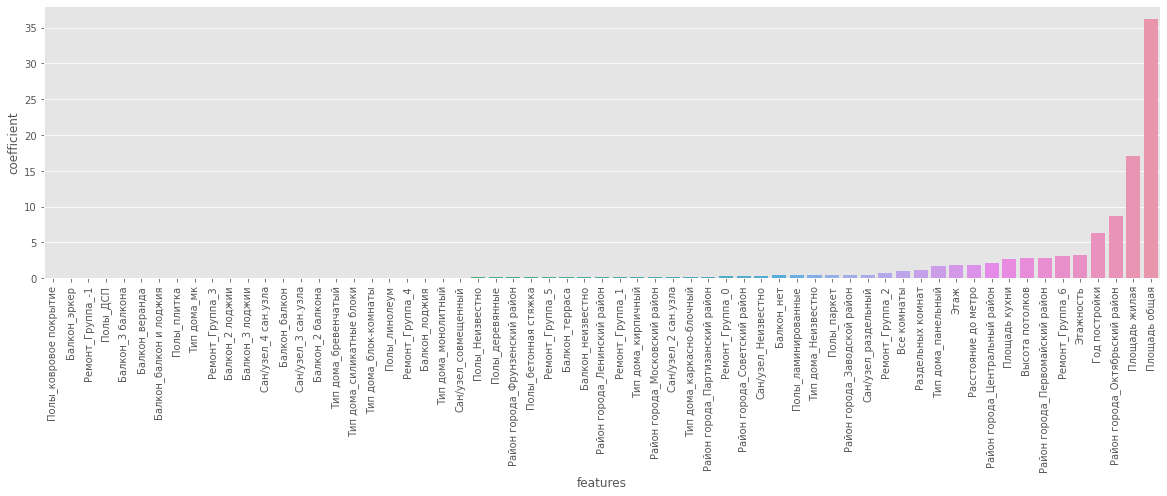

In [63]:
Feature_line = pd.DataFrame({'features': X_train.columns, 'coefficient':[i for i in list(cat.feature_importances_)]}).sort_values('coefficient')
plt.figure(figsize=(20,5))
sns.barplot(data=Feature_line, x='features', y='coefficient')
plt.xticks(rotation=90)
plt.show()

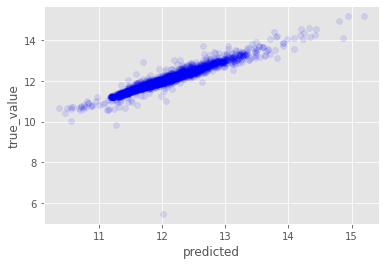

In [64]:
plt.scatter(cat_pred, y_test, alpha=0.1, c ="blue");
plt.xlabel('predicted');
plt.ylabel('true_value');

Как видно из всех моделей лучший результат получился у CatBoostRegressor